# CSCI 632 Homework 4 Answers

**Instructions**

* **Insert all code, plots, results, and discussion** into this Jupyter Notebook.
* Your homework should be submitted as a **single Jupyter Notebook** (.ipynb file).
* While working, you use Google Colab by uploading this notebook and performing work there. Once complete, export the notebook as a Jupyter Notebook (.ipynb) and submit it to **Blackboard.**

You can answer mathematical questions either by:
* using LaTeX in a markdown cell, or
* pasting a scanned or photographed handwritten answer.

In [430]:
from IPython.display import display, Math

# Converts a numpy array to a LaTeX matrix
def latex_matrix(matrix):
    latex_str = r'\begin{bmatrix}'
    for row in matrix:
        latex_str += ' & '.join(map(str, row)) + r' \\'
    latex_str += r'\end{bmatrix}'
    return latex_str

def print_matrix(matrix):
    display(Math(latex_matrix(matrix)))


## Part I. Gradients

Some problems involving matrix calculus.  Even those who have taken a linear algebra course may not be
familiar with matrix calculus.   So let's do a few problems starting from the more familiar scalar calculus 
and then vector calculus.

* $x$ is a scalar. $f(x)$ is a scalar function means the output is a scalar. $\nabla = \nabla_x = \frac{d}{dx}$. Ex: $\nabla_x x^2 = 2x$.
* $\mathbf{x}$ is a vector.  $f(\mathbf{x})$ is a scalar function that takes a vector argument.

$$\nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial f}{\partial x_1} \\
  \frac{\partial f}{\partial x_2} \\
  \vdots \\
  \frac{\partial f}{\partial x_n} \\
\end{bmatrix}
$$

#### Example I.1: Gradient of a paraboloid

$$f(\mathbf{x}) = -(x_1^2 + x_2^2)$$

$$\nabla f(\mathbf{x}) = \begin{bmatrix} -2x_1 \\ -2x_2 \end{bmatrix}$$

In [431]:
import matplotlib.pyplot as plt
import numpy as np

def f(x1, x2):
    return -(x1**2 + x2**2)/10


# Generate the grid
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = f(X1, X2)                   # evaluates at every (x1, x2) position in the X1, X2 matrices.



In [432]:
# Compute the gradients
#grad_x1, grad_x2 = np.gradient(Y, x1, x2)  This doesn't do what I expected.
#print(grad_x1)
#print(grad_x2)

grad_x1 = -2*X1/10
grad_x2 = -2*X2/10
#print(gradX1)

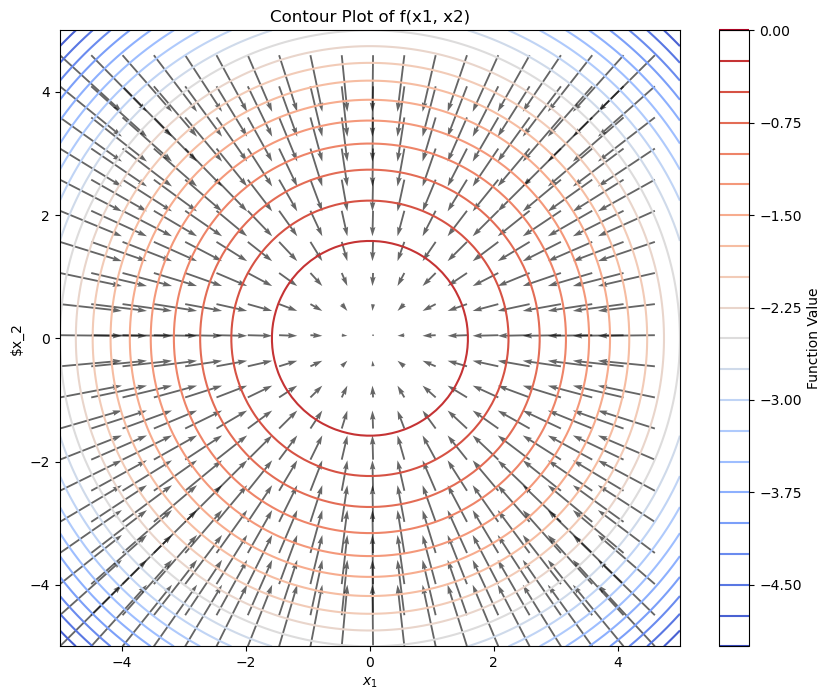

In [433]:
# Select every 5th point for a sparse quiver plot
skip = (slice(None, None, 5), slice(None, None, 5))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=1, alpha=0.6)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2")
plt.colorbar(contour, label="Function Value")
plt.show()

#### Example I.2: Gradient of a highly eccentric ellipsoid

$$f(\mathbf{x}) = -10x_1^2 -x_2^2,\quad \nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} -10x_1^2 -x_2^2 \\
  \frac{\partial}{\partial x_2} -10x_1^2 -x_2^2
\end{bmatrix} = \begin{bmatrix}
-20 x_1 \\
-2 x_2
\end{bmatrix}$$
  

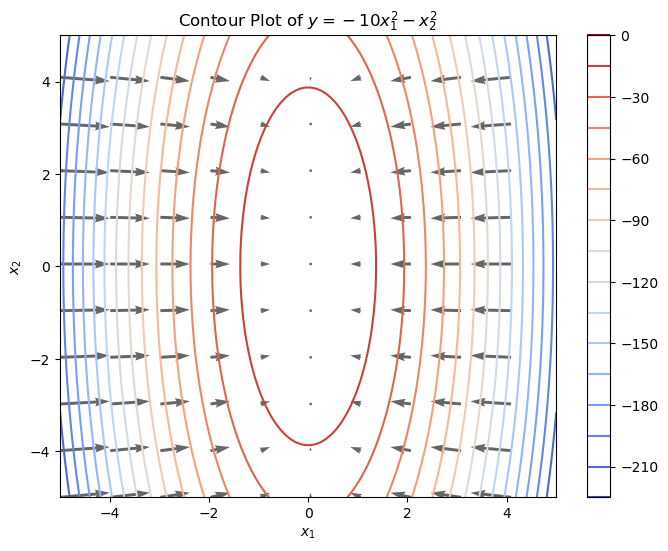

In [434]:
# Define a new function for the more eccentric ellipsoid
def ellipsoid(x1, x2):
    return -8 * x1**2 - x2**2 

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = ellipsoid(X1, X2)           # evaluates at every (x1, x2) position in the X1, X2 matrices.

# Adjust spacing to reduce the number of gradient vectors
new_spacing = 10  
X1_sub = X1[::new_spacing, ::new_spacing]
X2_sub = X2[::new_spacing, ::new_spacing]

# Compute gradient vectors 
grad_x1 = -20 * X1_sub
grad_x2 = -2 * X2_sub

# Plot the contour plot with selectively placed gradient vectors on the more eccentric ellipsoid
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Y, levels=20, cmap="coolwarm")
plt.colorbar(contour)

# Add fewer gradient vectors selectively at level curve positions
plt.quiver(X1_sub, X2_sub, grad_x1, grad_x2, color='black', angles='xy', scale_units='xy', scale=100, alpha=0.6)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Contour Plot of $y = -10x_1^2 - x_2^2$')
plt.show()

Note that the gradient vectors in the ellipsoid contour plot do not all point directly at the peak.  Instead
they point perpendicular to the contour curves.  

#### Example I.3: Colliding flows

$$
f(\mathbf{x}) = x_1 x_2^2 + a x_2,\quad \\
\nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} x_1 x_2^2 + a x_2 \\
  \frac{\partial}{\partial x_2} x_1 x_2^2 + a x_2
\end{bmatrix} = 
\begin{bmatrix}
  x_2^2 \\
  2 x_1 x_2 + a
\end{bmatrix}
$$

In [435]:
a = 0.5

def f(x1, x2):
    return x1 * x2**2 + a * x2

Y = f(X1, X2) 

# compute gradient
grad_x1 = X2**2   # performs an elementwise squaring.  It is taking the Hadamard product of X2 with itself.
grad_x2 = 2 * X1 * X2 + a


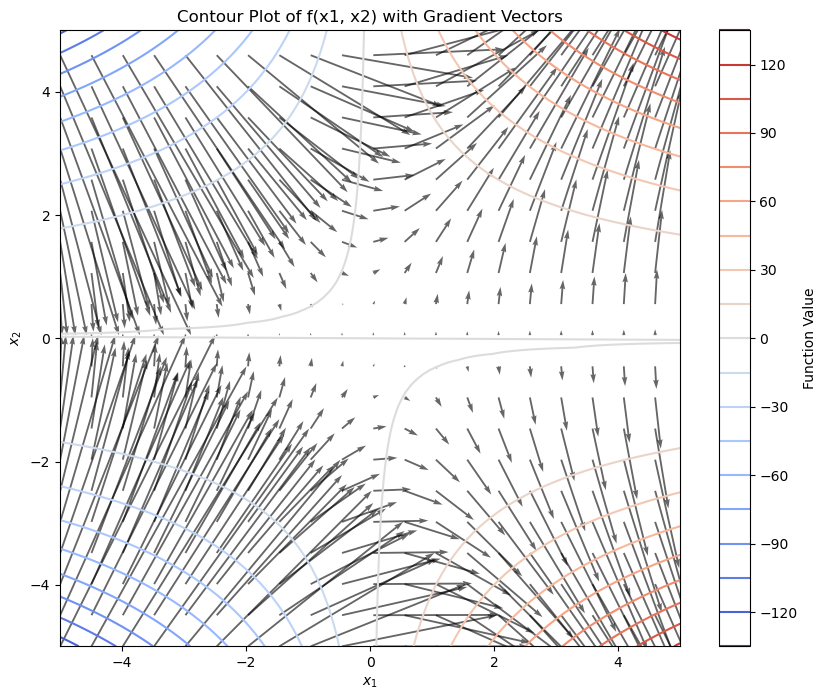

In [436]:
# Select every 5th point for a sparse quiver plot
skip = (slice(None, None, 5), slice(None, None, 5))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=10, alpha=0.6)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2) with Gradient Vectors")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar(contour, label="Function Value")
plt.show()

* $\mathbf{x}$ is a vector, $y$ is a scalar.

$$\nabla_{\mathbf{x}} f(\mathbf{x},y) = \begin{bmatrix}
  \frac{\partial f}{\partial x_1} \\
  \frac{\partial f}{\partial x_2} \\
  \vdots \\
  \frac{\partial f}{\partial x_n} \\
\end{bmatrix}
$$ 

When we specify a subscript to the $\nabla$ the gradient is only taken with respect to the variables specified
in the subscript.


#### Example I.4:

$$
f(\mathbf{x}, y) = x_1 x_2^2 y + a x_2,\quad \\
\nabla_\mathbf{x} f(\mathbf{x}, y) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} x_1 x_2^2 y + a x_2 \\
  \frac{\partial}{\partial x_2} x_1 x_2^2 y + a x_2
\end{bmatrix} = 
\begin{bmatrix}
  y x_2^2 \\
  2 x_1 x_2 y + a
\end{bmatrix}
$$

* $\mathbf{x}$ is a column vector.  $A$ is a square matrix.  $f(\mathbf{x}) = \mathbf{x}^T A \mathbf{x}$.

Because $f(\mathbf{x}) = \mathbf{x}^T A \mathbf{x}$ is a scalar function, we can apply the gradient.

#### Example I.5:

\begin{align}
  \nabla_{\mathbf{x}}
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix}^T \begin{bmatrix}
    2 & 1 \\
    1 & 3
  \end{bmatrix} 
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix}
&= \nabla_{\mathbf{x}}
  \begin{bmatrix}
    2 x_1 + x_2 & x_1 + 3 x_2
  \end{bmatrix} 
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix} \\
  \\
&= \begin{bmatrix}
  \frac{\partial}{\partial x_1} (2 x_1^2 + x_1 x_2 + x_1 x_2 + 3 x_2^2) \\
  \frac{\partial}{\partial x_2} (2 x_1^2 + x_1 x_2 + x_1 x_2 + 3 x_2^2)
  \end{bmatrix} \\
  \\
&= \begin{bmatrix}
    4 x_1 + 2 x_2 \\
    2 x_1 + 6 x_2
  \end{bmatrix} \\
  \\
&= 2 \begin{bmatrix}
    2 x_1 + x_2 \\
    x_1 + 3x_2
  \end{bmatrix} \\
  \\
&= 2 \begin{bmatrix}
 2 & 1 \\
 1 & 3
\end{bmatrix}
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix} \\
  \\
&= 2 A \mathbf{x}
\end{align}

This is analogous to taking the derivative of the 1-d scalar function of $f(x) = a x^2$.

$$\frac{d}{dx} f(x) = \frac{d}{dx} a x^2 = 2 a x$$

Example I.5, illustrates a general matrix calculus rule:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = 2 A \mathbf{x}$$


#### Gradient Chain Rule

With gradients, we can replace a variable with another in an analogous manner as we would in scalar calculus.

Suppose we have $f(\mathbf{x}) = e^{x_1^2 + x_2^2}$ and we want to compute $\nabla_x f(\mathbf{x})$, 
we could decompose $f$ into two functions and apply a change of variables to simplify the derivative into
a familiar form.

$$f(\mathbf{x}) = g(h(\mathbf{x}))$$

where $u = h(\mathbf{x}) = x_1^2 + x_2^2$ and $g(u) = e^{\mathbf{u}}$

$$\nabla_x f(\mathbf{x}) = \nabla_x h(\mathbf{x})~\nabla_u g(u)$$

Since $u$ is a scalar, $\nabla_u = \frac{d}{du}$, so we can rewrite this as

$$\nabla_x f(\mathbf{x}) = \nabla_x h(\mathbf{x})~\frac{d}{du} g(u)$$


Substituting in the definitions of $g(u)$ and $h(\mathbf{x})$ yields

$$\nabla_x f(\mathbf{x}) = \frac{d}{du} e^u~\nabla_x (x_1^2 + x_2^2)$$


$$\nabla_x f(\mathbf{x})  = e^{x_1^2 + x_2^2} \cdot \begin{bmatrix} 2x_1 \\ 2x_2 \end{bmatrix}.$$

Which can be rearranged to yield

$$\nabla_x f(\mathbf{x})  =  \begin{bmatrix} 2x_1 e^{x_1^2 + x_2^2} \\ 2x_2 e^{x_1^2 + x_2^2} \end{bmatrix}.$$



```


```

# Problem 1

**(a)** From Example I.4, find $\nabla_y f(\mathbf{x}, y)$.

**Answer (a)**

$$
f(\mathbf{x}, y) = x_1 x_2^2 y + a x_2,\quad \\
\nabla_\mathbf{y} f(\mathbf{x}, y) = \frac{d}{dy} x_1 x_2^2 y + a x_2 = x_1 x_2^2
$$


**(b)** Given $f(\mathbf{x}) = (x_1+2)^2 - (x_2 -1)^2$, find $\nabla f(\mathbf{x})$, the gradient of $f$ with respect to $\mathbf{x}$.  Note: $\nabla f(\mathbf{x}) = \nabla_{\mathbf{x}} f(\mathbf{x})$ since $\mathbf{x} = (x_1, x_2)$ includes all variables in $f(\mathbf{x})$.

**Answer (b)**

$$\nabla f(\mathbf{x}) = 
\begin{bmatrix}
  \frac{\partial}{\partial x_1} \big((x_1+2)^2 - (x_2 -1)^2 \big) \\
  \frac{\partial}{\partial x_2} \big((x_1+2)^2 - (x_2 -1)^2 \big)
\end{bmatrix} =
\begin{bmatrix}
  2(x_1+2) \\
  -2(x_2 -1))
\end{bmatrix}
$$

**(c)** Plot the contour plot for $\nabla_x f(\mathbf{x})$ given in part (b), overlaying gradient vectors.

**Answer (c)**

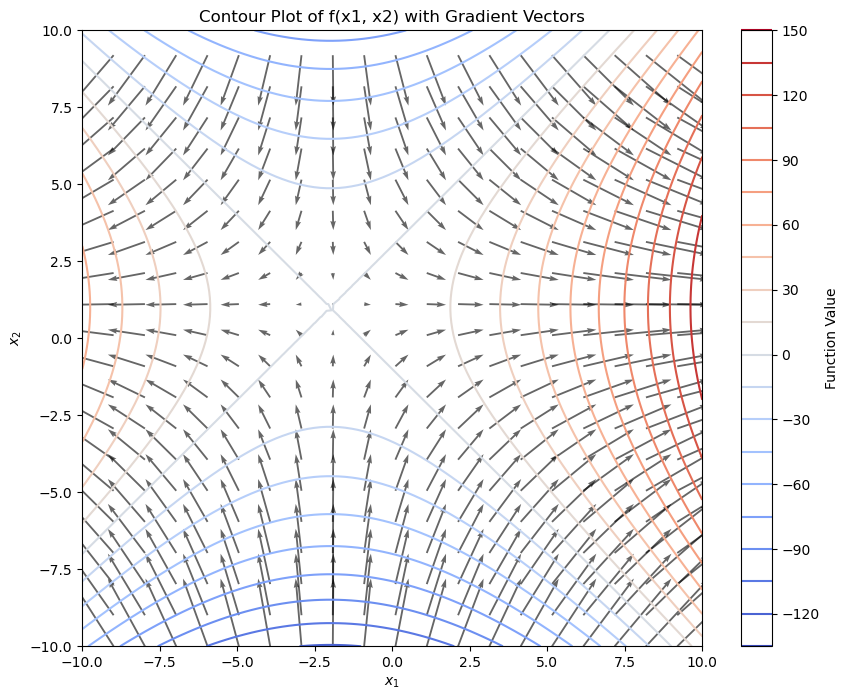

In [437]:

def f(x1, x2):
    return (x1 + 2)**2 - (x2 -1 )**2
    

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = f(X1, X2)                   # evaluates at every (x1, x2) position in the X1, X2 matrices.

# compute gradient
grad_x1 = 2 * (X1 + 2)   # performs an elementwise squaring.  It is taking the Hadamard product of X2 with itself.
grad_x2 = -2 * (X2 - 1)

# Select every 5th point for a sparse quiver plot
skip = (slice(None, None, 5), slice(None, None, 5))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=10, alpha=0.6)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2) with Gradient Vectors")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar(contour, label="Function Value")
plt.show()

**(d)** Given $f(\mathbf{x}) = e^{-x_1^2}e^{-2x_2^2}$, find $\nabla_x f(\mathbf{x})$.

**Answer (d)**

$$\nabla_x f(\mathbf{x})= 
\begin{bmatrix}
\frac{\partial}{\partial x_1} \big(e^{-x_1^2}e^{-2x_2^2}\big) \\
\frac{\partial}{\partial x_2} \big(e^{-x_1^2}e^{-2x_2^2}\big) \\
\end{bmatrix} =
\begin{bmatrix}
\big(-2x_1 e^{-x_1^2}e^{-2x_2^2}\big) \\
\big(-4x_2 e^{-x_1^2}e^{-2x_2^2}\big) \\
\end{bmatrix}
$$

**(e)** Plot the contour plot for $\nabla_x f(\mathbf{x})$ given in part (d), overlaying gradient vectors.

**Answer (e)**

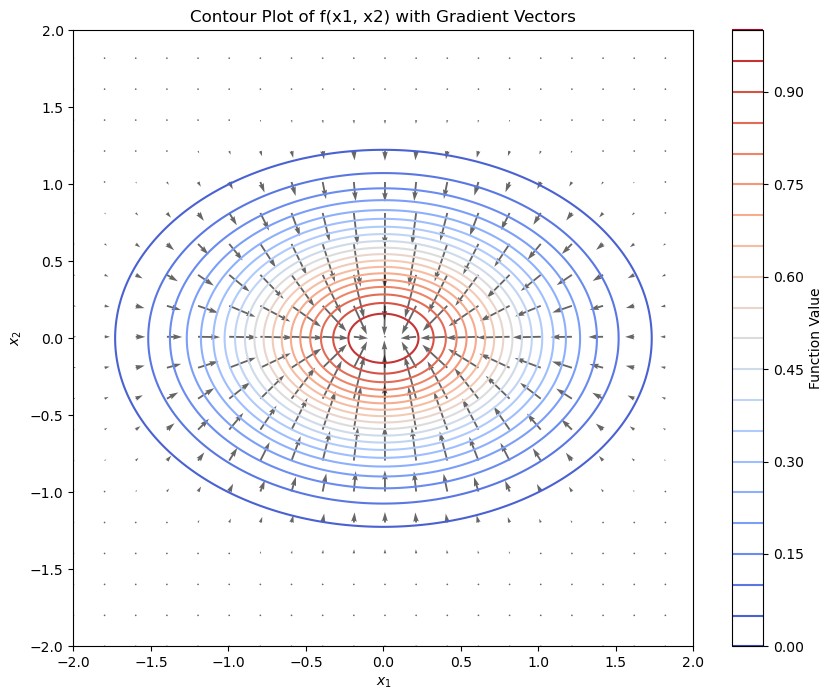

In [438]:
from numpy import exp

a = 0.5

def f(x1, x2):
    return exp(-x1**2) * exp(-2*x2**2)

x1 = np.linspace(-2, 2, 200)
x2 = np.linspace(-2, 2, 200)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = f(X1, X2)                   # evaluates at every (x1, x2) position in the X1, X2 matrices.


# compute gradient
grad_x1 = -2 * X1 * exp(-X1**2) * exp(-2 * X2**2)   # performs an elementwise squaring.  It is taking the Hadamard product of X2 with itself.
grad_x2 = -4 * X2 * exp(-X1**2) * exp(-2 * X2**2)

# Select every 10th point for a sparse quiver plot
skip = (slice(None, None, 10), slice(None, None, 10))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=4, alpha=0.6)

plt.xlim(-2,2)
plt.ylim(-2,2)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2) with Gradient Vectors")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar(contour, label="Function Value")
plt.show()

**(f)** Show that $\nabla_x\mathbf{x}^T A \mathbf{x} = (A + A^T) \mathbf{x}$ for $A = \begin{bmatrix} 3 & 7 \\ 0 & 1 \end{bmatrix}$


**Answer (f)**

\begin{align}
\nabla_x\mathbf{x}^T A \mathbf{x} &= 
\nabla_x \bigg( \begin{bmatrix} 
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
3 & 7 \\
0 & 1 \\
\end{bmatrix}
\begin{bmatrix} 
x_1 \\
x_2
\end{bmatrix}
\bigg) \\
\\
&=
\nabla_x \bigg(
  \begin{bmatrix} 
  3 x_1 & 7 x_1 + x_2
  \end{bmatrix}
  \begin{bmatrix} 
  x_1 \\
  x_2
  \end{bmatrix}
\bigg) \\
\\
&=
\nabla_x \bigg(
  \begin{bmatrix} 
  3 x_1^2 + 7 x_1 x_2 + x_2^2
  \end{bmatrix}
\bigg) \\  
  &=
  \begin{bmatrix}
    \frac{\partial}{\partial x_1} \big(3 x_1^2 + 7 x_1 x_2 + x_2^2 \big) \\
    \frac{\partial}{\partial x_2} \big(3 x_1^2 + 7 x_1 x_2 + x_2^2 \big)
  \end{bmatrix} \\
\\
  &=
  \begin{bmatrix}
    6 x_1 + 7 x_2 \\
    7 x_1 + 2 x_2
  \end{bmatrix} \\
\end{align}

$$(A + A^T) \mathbf{x} = \bigg(
\begin{bmatrix}
  3 & 7 \\
  0 & 1
\end{bmatrix} +
\begin{bmatrix}
  3 & 0 \\
  7 & 1
\end{bmatrix} 
\bigg)
\begin{bmatrix}
  x_1 \\
  x_2
\end{bmatrix} =
\begin{bmatrix}
  6 x_1 + 7 x_2 \\
  7 x_1 + 2 x_2
\end{bmatrix}
$$


## Part II. Jacobian

* $\mathbf{x}$ is a vector and $\mathbf{f(x)}$ is a vector function.  In other words,

$$\mathbf{f}(\mathbf{x}) = \begin{bmatrix}
  f_1(\mathbf{x}) \\
  f_2(\mathbf{x}) \\
  \vdots \\
  f_n(\mathbf{x})
\end{bmatrix}
$$


When the function is a vector function we use the Jacobian.

$$
J_{\mathbf{f}}(\mathbf{x}) = \begin{bmatrix} 
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n}\\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
  \vdots                            &                                   & \ddots & \\
  \frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_n}
\end{bmatrix}
$$

In machine learning, statistics, and economics, it is
common to use the $\nabla$ to denote a Jacobian when operating on a vector function. Although mathematicians may object
since the gradient is strictly speaking applied to a scalar function.
As such,

$$\nabla \mathbf{f}(\mathbf{x}) = \begin{bmatrix} 
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n}\\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
  \vdots                            &                                   & \ddots & \\
  \frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_n}
\end{bmatrix}
$$

Each row of the Jacobian is the gradient of a component in the vector function.  For example, the first row transposed is

$$
\nabla f_1(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} \\
\frac{\partial f_1}{\partial x_2} \\
\vdots \\
\frac{\partial f_1}{\partial x_n}
\end{bmatrix}
$$



* $\mathbf{x}$ is a column vector. $\mathbf{f}(\mathbf{x}) = A \mathbf{x}$ is a vector function.

$$\nabla_{\mathbf{x}} A \mathbf{x} = A$$

But to demonstrate this, we need to use the definition of the Jacobian.

Ex:

$$\nabla_{\mathbf{x}}
\begin{bmatrix}
  1 & 2 \\
  3 & 5
\end{bmatrix} 
\begin{bmatrix}
  x_1 \\
  x_2
\end{bmatrix} = \nabla_{\mathbf{x}}
\begin{bmatrix}
  x_1  + 2 x_2 \\
  3 x_1 + 5 x_2
\end{bmatrix} =
\begin{bmatrix}
  \frac{\partial}{\partial x_1} (x_1  + 2 x_2)  & \frac{\partial}{\partial x_2} (x_1  + 2 x_2) \\
  \frac{\partial}{\partial x_1} (3 x_1 + 5 x_2) & \frac{\partial}{\partial x_2} (3 x_1 + 5 x_2) \\
\end{bmatrix} =
\begin{bmatrix}
  1 & 2 \\
  3 & 5
\end{bmatrix} 
$$

This is analogous to taking the derivative of the 1-d scalar function of $f(x) = a x$.

$$\frac{d}{dx} f(x) = \frac{d}{dx} ax = a$$

# Problem 2

**(a)** Find the Jacobian $\nabla \mathbf{f}(\mathbf{x})$ where $\mathbf{f}(\mathbf{x})$ is given by

$$\mathbf{f}(\mathbf{x}) = \begin{bmatrix} x_1^2 \\ x_1 x_2 \\ \sin(x_2) \end{bmatrix}$$

**Answer (a)**

$$
J_{\mathbf{f}}(\mathbf{x}) = \nabla \mathbf{f}(\mathbf{x}) = \begin{bmatrix} 
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} \\
  \frac{\partial f_3}{\partial x_1} & \frac{\partial f_3}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
  2 x_1 & 0 \\
  x_2 & x_1 \\
  0 & \cos(x_2)
\end{bmatrix}
$$


**(b)** Show the Jacobian $\nabla_x A \mathbf{x} = A$ for $A = \begin{bmatrix} 3 & -2 \\ 5 & 1 \end{bmatrix}$.  Show each step.

**Answer (b)**

\begin{align}
\nabla_x A \mathbf{x} &= 
\nabla_x \bigg( \begin{bmatrix}
  3 & -2 \\
  5 & 1
\end{bmatrix} 
\begin{bmatrix}
  x_1 \\
  x_2
\end{bmatrix} \bigg) \\
\\
&=
\nabla_x \begin{bmatrix}
  3 x_1 -2 x_2 \\
  5 x_1 + x_2
\end{bmatrix} \\
\\
&=
\begin{bmatrix}
  \frac{\partial}{\partial x_1 } (3 x_1 -2 x_2) & \frac{\partial}{\partial x_2 } (3 x_1 -2 x_2) \\
  \frac{\partial}{\partial x_1 } (5 x_1 + x_2)  & \frac{\partial}{\partial x_2 } (5 x_1 + x_2)
\end{bmatrix} \\
\\
&=
\begin{bmatrix}
  3 & -2 \\
  5 & 1
\end{bmatrix}
\end{align}


**(c)** Find the Jacobian $\nabla \mathbf{g}(\mathbf{x})$ where $\mathbf{g}(\mathbf{x}) = B \mathbf{x} + \mathbf{c}$ with

$$
B = \begin{bmatrix}
  1 & 2 \\ 
  3 & 4
\end{bmatrix}, \quad \mathbf{c} = \begin{bmatrix}
 5 \\ 
 6
 \end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix}
 x_1 \\
 x_2
\end{bmatrix}
$$

**Answer (c)**

We can view each row of B as an equation and $\mathbf{c}$ is an offset.

\begin{align}
\nabla \mathbf{g}(\mathbf{x}) &= \nabla \begin{bmatrix}
    x_1 + 2 x_2 + 5 \\
    3 x_1 + 4 x_2 + 6
\end{bmatrix} \\
\\
&= 
\begin{bmatrix}
  \frac{\partial}{\partial x_1} (x_1 + 2 x_2 + 5) &
  \frac{\partial}{\partial x_2} (x_1 + 2 x_2 + 5) \\
  \frac{\partial}{\partial x_1} (3 x_1 + 4 x_2 + 6) &
  \frac{\partial}{\partial x_2} (3 x_1 + 4 x_2 + 6)
\end{bmatrix} \\
\\
&=
\begin{bmatrix}
  1 & 2  \\
  3 & 4 
\end{bmatrix}
\end{align}

**(d)** Compute the Jacobian $\nabla \mathbf{p}(\mathbf{x})$ for a transformed input $\mathbf{x} = T \mathbf{z}$, where $\mathbf{p}(\mathbf{z}) = A \mathbf{x} = A(T \mathbf{z})$. Assume $A$ and $T$ are constant matrices.

**Answer (d)**

The transformation is irrelevant to this problem, since the gradient is taken with
respect to $\mathbf{x}$.  However, if you interpreted the question as $\nabla \mathbf{p}(\mathbf{z})$,
we will also accept that answer (see alternative solution).

*First Solution*

$\nabla \mathbf{p}(\mathbf{x}) = A$.

Simply stating this is sufficient to get credit.  However, I always like to see a little more work to
demonstrate understanding.   For example. let's expand the solution to show why this is the case, we
can apply the Jacobian, wherein each row represents an equation.

$$p_i = a_{i1} x_1 + a_{i2} x_2 + \cdots + a_{in} x_n$$

Using the Jacobian, we rewrite this as

\begin{align} 
  \nabla \mathbf{p}(\mathbf{x}) &= \begin{bmatrix} 
  \frac{\partial p_1}{\partial x_1} & \frac{\partial p_1}{\partial x_2} & \cdots & \frac{\partial p_1}{\partial x_n}\\
  \frac{\partial p_2}{\partial x_1} & \frac{\partial p_2}{\partial x_2} & \cdots & \frac{\partial p_2}{\partial x_n} \\
  \vdots                            &                                   & \ddots & \\
  \frac{\partial p_m}{\partial x_1} & \frac{\partial p_m}{\partial x_2} & \cdots & \frac{\partial p_m}{\partial x_n}
\end{bmatrix} \\
 \\
 & =
\begin{bmatrix} 
  \frac{\partial}{\partial x_1} (a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n) & 
  \frac{\partial}{\partial x_2} (a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n) & \cdots &
  \frac{\partial}{\partial x_n} (a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n)\\
  \frac{\partial}{\partial x_1} (a_{21} x_1 + a_{22} x_2 + \cdots + a_{2n} x_n) & 
  \frac{\partial}{\partial x_2} (a_{21} x_1 + a_{22} x_2 + \cdots + a_{2n} x_n) & \cdots &
  \frac{\partial}{\partial x_n} (a_{21} x_1 + a_{22} x_2 + \cdots + a_{2n} x_n)\\
  \vdots                            &                                   & \ddots & \\
  \frac{\partial}{\partial x_1} (a_{m1} x_1 + a_{m2} x_2 + \cdots + a_{mn} x_n) &
  \frac{\partial}{\partial x_2} (a_{m1} x_1 + a_{m2} x_2 + \cdots + a_{mn} x_n) & \cdots &
  \frac{\partial}{\partial x_n} (a_{m1} x_1 + a_{m2} x_2 + \cdots + a_{mn} x_n)
\end{bmatrix} \\
\\
& =
\begin{bmatrix} 
  a_{11} & a_{12} & \cdots & a_{1n}  \\ 
  a_{21} & a_{22} & \cdots & a_{2n}  \\ 
  \vdots &        & \ddots & \vdots  \\
  a_{m1} & a_{m2} & \cdots & a_{mn}  \\
\end{bmatrix} = A
\end{align}

*Second solution*

We also accept the interpretation of this problem as finding $\nabla \mathbf{p}(\mathbf{z})$ which
we can solve using the chain rule as follows


$$\nabla \mathbf{p}(\mathbf{z}) = \nabla_x A \mathbf{x} \cdot \nabla_z T \mathbf{z}~\hspace{1in}(2.d.1)$$ 

$$\nabla_z T \mathbf{z} = T~\hspace{1in}(2.d.2)$$

$$\nabla_x A \mathbf{x} = A~\hspace{1in}(2.d.3)$$

Substituting (2.d.2) and (2.d.3) into (2.d.1) yields

$$\nabla \mathbf{p}(\mathbf{z}) = AT$$

*Third solution*

Even simpler, because $A$ and $T$ are constant matrices we can combine them.

Let C = AT.

$$\mathbf{p}(\mathbf{x}) = A(T\mathbf{z}) = (AT)\mathbf{z} = C\mathbf{z}.$$

$$\nabla_z C\mathbf{z} = C = AT$$

## Part III. Trace operator

The trace operator is the sum of the diagonal elements of a square matrix.

$$
\operatorname{tr}(A) = \sum_{i=1}^n A_{ii}
$$

let $A$ be

$$A = \begin{bmatrix}
  1 & 3 \\
  2 & 7 
\end{bmatrix}
$$

$$
\operatorname{tr}(A) = 1 + 7 = 8
$$

The trace operator has some interesting properties.

### III.1. Linear

$$\operatorname{tr}(A + B) = \operatorname{tr}(A) + \operatorname{tr}(B)$$
$$\operatorname{tr}(cA) = c \operatorname{tr}(A)$$

Example:

$$A = \begin{bmatrix}
  1 & 3 \\
  2 & 7 
\end{bmatrix},\quad 
B = \begin{bmatrix}
  4 & 0 \\
  1 & 1 
\end{bmatrix}
$$

$$
\operatorname{tr}(A) + \operatorname{tr}(B) = 8 + 5 = 13
$$

$$
\operatorname{tr}(A+B) = \operatorname{tr} \begin{bmatrix}
  5 & 3 \\
   3 & 8 
\end{bmatrix} = 8 + 5 = 13
$$

### III.2. Cyclic

$$\operatorname{tr}(ABC) = \operatorname{tr}(BCA) = \operatorname{tr}(CAB)$$

Example:

$$A = \begin{bmatrix}
  1 & 2 \\
  3 & 7 
\end{bmatrix},\quad 
B = \begin{bmatrix}
  4 & 0 \\
  1 & 1 
\end{bmatrix},\quad
C = \begin{bmatrix}
  2 & 1/2 \\
  2 & 1 
\end{bmatrix}
$$


In [439]:
import numpy as np

# Python uses a column major representation, meaning
# A[i][j] = A_{ij}.
                 
A = np.array(  
    [ [ 1, 2 ],
      [ 3, 7 ] 
    ]) 
B = np.array(
    [ [4, 0],
      [1, 1]
    ])
C = np.array(
    [ [2, 1/2],
      [2, 1]
    ])

display(Math(f"$$ABC={latex_matrix(A@B@C)}$$"))
display(Math(f"$$\operatorname{{tr}}(ABC)={np.trace(A@B@C)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [440]:
np.trace(A)

8

In [441]:
display(Math(f"$$BCA={latex_matrix(B@C@A)}$$"))
display(Math(f"$$\operatorname{{tr}}(BCA)={np.trace(B@C@A)}"))
display(Math(f"$$CAB  ={latex_matrix(C@A@B)}$$"))
display(Math(f"$$\operatorname{{tr}}(CAB)={np.trace(C@A@B)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## III.3. Trace equal to the Trace of a Transpose

$$\operatorname{tr}(A) = \operatorname{tr}(A^T)$$

Ex:

$$A = \begin{bmatrix}
  1 & 3 \\
  2 & 7 
\end{bmatrix},\quad
A^T = \begin{bmatrix}
  1 & 2 \\
  3 & 7 
\end{bmatrix}
$$

$$\operatorname{tr}(A) = 1 + 7,\quad \operatorname{tr}(A^T) = 1 + 7$$




## III.4. Trace of an Outer Product

Where $\mathbf{x}$ and $\mathbf{y}$ are column vectors.

$$\operatorname{tr}(\mathbf{x} \mathbf{y}^T) = \mathbf{x}^T \mathbf{y}$$

Ex:

$$\mathbf{x} = \begin{bmatrix}
1 \\
2
\end{bmatrix},\quad \mathbf{y} = \begin{bmatrix}
3 \\
4
\end{bmatrix}, \quad \mathbf{x} \mathbf{y}^T = \begin{bmatrix}
3 & 4 \\
6 & 8
\end{bmatrix}
$$

$$\operatorname{tr} \bigg( \begin{bmatrix}
3 & 4 \\
6 & 8
\end{bmatrix} \bigg) = 3 + 8 = 11$$

$$\mathbf{x}^T \mathbf{y} = 1 \cdot 3 + 2 \cdot 4 = 11$$


# Problem 3 

**(a)** Find $\operatorname{tr}(A)$, showing how and then confirm with numpy for the $A$ given below. 

$$
A = \begin{bmatrix} 4 & -2 & 3 \\ -1 & -5 & -6 \\ 7 & -3 & 2 \end{bmatrix}
$$

**Answer (a)**

$$\operatorname{tr}(A) = 4 + (-5) + 2 = 1$$

In [442]:
import numpy as np
A = np.array([
      [ 4, -2, 3],
      [-1, -5, -6],
      [7, -3, 2]
    ])

display(Math(f"$$\operatorname{{tr}}(A)=\operatorname{{tr}}({latex_matrix(A)}) = {np.trace(A)}$$"))


<IPython.core.display.Math object>


**(b)**  Find 

$$\operatorname{tr}(\begin{bmatrix}
4 & 7 \\
1 & 3
\end{bmatrix}^T)
$$



**Answer (b)**

\begin{align}
\operatorname{tr}((\begin{bmatrix}
4 & 7 \\
1 & 3
\end{bmatrix}^T) = 
\operatorname{tr}(\begin{bmatrix}
4 & 1 \\
7 & 3
\end{bmatrix}) =
4 + 3 = 7
\end{align}

**(c)** Given 

$$
A = \begin{bmatrix}
 7 & 1/2 & 1/2 \\
 4 & 2   & 3 \\
 8 & 1   & 1
\end{bmatrix}, 
B = \begin{bmatrix} 
 5 & 9 & 7 \\
 8 & 4 & 3 \\
 9 & 9 & 8 
\end{bmatrix},
C = \begin{bmatrix} 
 9 & 4 & 4 \\
 4 & 1 & 8 \\
 6 & 5 & 5
\end{bmatrix}
$$
and 

$$\operatorname{tr}(ABC) = 2852.5$$.

Find $\operatorname{tr}(BCA)$.

**Answer (c)**

Due to the cyclic property of the trace operator.

$$\operatorname{tr}(BCA) = 2852.5$$.

### Part IV.  Matrix Derivatives

* $f(A)$ is a scalar function. $A$ is an $m \times n$  matrix.

$$\nabla_A f(A) = \begin{bmatrix}
  \frac{\partial f}{\partial A_{11}} & \frac{\partial f}{\partial A_{12}} & \cdots & \frac{\partial f}{\partial A_{1n}} \\
  \frac{\partial f}{\partial A_{21}} & \frac{\partial f}{\partial A_{22}} &        & \frac{\partial f}{\partial A_{2n}} \\
  \vdots                            &                                     & \ddots & \vdots \\
  \frac{\partial f}{\partial A_{m1}} & \frac{\partial f}{\partial A_{m2}} & \cdots & \frac{\partial f}{\partial A_{mn}} 
  \end{bmatrix}
$$

More succinctly put

$$\nabla_A f(A) = 
\left( \nabla_A f \right)_{ij} = \frac{\partial f(A)}{\partial A_{ij}}
$$



* $A$ and $X$ are matrices.  $\nabla_X AX = ????$

So far we have used the $\nabla$ operator in two ways: when applied to a scalar function it means that we take
the gradient, when applied to a vector function it means to take the Jacobian.  To extend the notion of the 
gradient to matrix derivatives, we need to scalarize the expression so that standard differentiation rules apply.

### Scalarization via the Trace Operator

The trace operator reduces a matrix expression to a scalar by summing its diagonal elements.
This allows us to apply the gradient operator to matrix expressions in a way consistent with
scalar calculus. Thus, we define:

$$
\nabla_X AX = \nabla_X \operatorname{tr}(AX)
$$

This approach is commonly referred to as the *trace trick*. By applying the trace operator,
we transform the matrix expression into a scalar function of  X , making it possible to take
the gradient with respect to $X$.

For example, 

\begin{align}
\nabla_X AX = \nabla_X \operatorname{tr}(AX) &= \nabla_X \operatorname{tr}\bigg(\begin{bmatrix}
 & (a_{11} x_{11} + a_{12} x_{21} + \cdots + a_{1n} x_{n1}) \hspace{1.5in} \cdots \\
 & \vdots  \hspace{0.3in} (a_{21} x_{12} + a_{22} x_{22} + \cdots + a_{2n} x_{n2}) && \vdots\\
 &                                         \hspace{2.5in}  &\ddots                  &&\vdots \\
 & \cdots                                   && (a_{n1} x_{1n} + a_{n2} x_{2n} + \cdots + a_{nn} x_{nn}) \\
 \end{bmatrix}\bigg)  \\
 \\
 &= \nabla_X \operatorname{tr}\bigg(\begin{bmatrix}
 & (\sum_{i=1}^n a_{1i} x_{i1}) \hspace{1.5in} &\cdots \\
 &  \vdots \hspace{0.3in} (\sum_{i=1}^n a_{2i} x_{i2}) &&\vdots \\
 &                                                 &\ddots & \\
 & \cdots                                             && (\sum_{i=1}^n a_{ni} x_{in})
 \end{bmatrix}\bigg) \\
 \\
 &= \nabla_X \sum_{j=1}^n \sum_{i=1}^n a_{ji} x_{ij} 
 \end{align}

Now we have reduced the matrix to a scalar function.  

Let $f(X) = \sum_{j=1}^n \sum_{i=1}^n a_{ji} x_{ij}$ and the above becomes

$$\nabla_X f(X) = \begin{bmatrix}
  \frac{\partial f}{\partial x_{11}} & \frac{\partial f}{\partial x_{12}} & \cdots & \frac{\partial f}{\partial x_{1n}} \\
  \frac{\partial f}{\partial x_{21}} & \frac{\partial f}{\partial x_{22}} &        & \frac{\partial f}{\partial x_{2n}} \\
  \vdots                            &                                     & \ddots & \vdots \\
  \frac{\partial f}{\partial x_{m1}} & \frac{\partial f}{\partial x_{m2}} & \cdots & \frac{\partial f}{\partial x_{mn}} 
  \end{bmatrix} = \begin{bmatrix}
    a_{11} & a_{21} & \cdots & a_{n1} \\
    a_{12} & a_{22} & \cdots & a_{n2} \\
    \vdots &        & \ddots &  \vdots \\
    a_{1n} & a_{2n} & \cdots & a_{nn}
  \end{bmatrix} = A^T
$$



## 

# Problem 4

**(a)** Use the trace operator to find $\nabla_A x^T A x~$.  This is more general than in problem 1, since I have not 
specified values for A.  Hint: the trace of a scalar is itself.  2nd Hint: use the cyclic property of the trace operator.

**Answer (a)**

$$\nabla_A x^T A x~ = \nabla_A \operatorname{tr}(x^T A x) = \nabla_A \operatorname{tr}(x x^T A) \hspace{1in} (4.a.1)$$

The $x x^T$ in Equation $(4.a.1)$ is a symmetric matrix resulting from the outer production of the column vector $\mathbf{x}$ 
with its transpose.  Let $B = x x^T$.   Substituting $B$ into $(4.a.1)$ yields

$$\nabla_A x^T A x~ =\nabla_A \operatorname{tr}(B A) \hspace{1in} (4.a.2)$$

Equation $(4.a.2)$ has the same form as discussed in the Section titled "Scalarization
via the Trace Operator."  Thus $(4.a.2)$ becomes

$$\nabla_A x^T A x = B^T \hspace{1in} (4.a.3)$$

Because $B$ is a symmetric matrix, $B = B^T$.   Substituting the definition for $B$ into $(4.a.3)$ thus yields

$$\nabla_A x^T A x = x x^T$$



**(b)** Consider a machine learning model $\hat{y} = h_{\boldsymbol{\Theta}}(\mathbf{x})$ 
where the input is a feature vector $\mathbf{x}$, and $\boldsymbol{\Theta}$ is a
parameter vector.  We are given a training set $\{\mathbf{x}^{(i)}, y^{(i)}\}$. 
However, it is common in machine learning to represent the training set as a design matrix $X$ and
a result vector $\mathbf{y}$.  The parameter vector $\boldsymbol{\Theta}$ contains $n+1$ parameters
wherein $\Theta_0$ is the bias parameter, and all data points $\mathbf{x}$ likewise contain 
$n+1$ dimensions due to the first element being 1, i.e., 

$$\boldsymbol{\Theta} = \begin{bmatrix}
  \Theta_0 \\
  \Theta_1 \\
  \vdots \\
  \Theta_n
\end{bmatrix},\quad
\mathbf{x} = \begin{bmatrix}
  1 \\
  x_1 \\
  \vdots \\
  x_n
\end{bmatrix}
$$  

Thus, the design matrix is an $m \times (n+1)$ matrix where each
row corresponds to a feature vector for a specific datapoint in the training set and each
column represents a feature.  There are $m$ rows corresponding to there being $m$ data points.

Consider a loss function $J(\mathbf{\Theta})$ where $\mathbf{y}$ are the expected outputs from a training set
and $\mathbf{\hat{y}}$ are the model outputs.  $\lambda$ is a constant.  Find the gradient of the
loss function $\nabla_{\boldsymbol{\Theta}} J(\mathbf{\Theta})$.

$$J(\boldsymbol{\Theta}) = (\mathbf{\hat{y}} - \mathbf{y})^T (\mathbf{\hat{y}} - \mathbf{y}) + \lambda \mathbf{\hat{y}}^T \mathbf{\hat{y}} $$

where $\mathbf{\hat{y}} = X\mathbf{\Theta}$.  

Aside: $\lambda \mathbf{\hat{y}}^T \mathbf{\hat{y}}$ is a regularization term.  It punishes the
model for outputs that are far from the origin.  Regularization terms help generalize a model
by restraining extreme ouputs which can occur when a model exhibits overfitting.

**Answer (b)**:

\begin{align}
\nabla_{\boldsymbol{\Theta}} J(\boldsymbol{\Theta}) &= 
    \nabla_{\boldsymbol{\Theta}}\big((\mathbf{\hat{y}} - \mathbf{y})^T (\mathbf{\hat{y}} - \mathbf{y}) +
    \lambda \mathbf{\hat{y}}^T \mathbf{\hat{y}}\big) \\
\\
&= 
    \nabla_{\boldsymbol{\Theta}}\big((\mathbf{\hat{y}}^T - \mathbf{y}^T) (\mathbf{\hat{y}} - \mathbf{y}) +
    \lambda \mathbf{\hat{y}}^T \mathbf{\hat{y}}\big) \\
\\
&= 
    \nabla_{\boldsymbol{\Theta}}\big(\hat{\mathbf{y}}^T \mathbf{\hat{y}} - \mathbf{y}^T  \mathbf{\hat{y}}
   - \mathbf{\hat{y}}^T \mathbf{y} + \mathbf{y}^T  \mathbf{y} +
    \lambda \hat{\mathbf{y}}^T \mathbf{\hat{y}}\big) \\
\\
&= \nabla_{\boldsymbol{\Theta}}\big((1+\lambda) \mathbf{\hat{y}}^T \mathbf{\hat{y}} - \mathbf{y}^T  \mathbf{\hat{y}}
   - \mathbf{\hat{y}}^T \mathbf{y} + \mathbf{y}^T  \mathbf{y}\big)\\
\end{align}

$\mathbf{y}^T \mathbf{\hat{y}}$ is a dot product.  A dot product results in a scalar.  Scalars are
unaffected by the transpose operation, thus

$$\mathbf{y}^T  \mathbf{\hat{y}} = (\mathbf{\hat{y}}^T \mathbf{y})^T = \mathbf{\hat{y}}^T \mathbf{y}$$

resulting in 

$$\nabla_{\boldsymbol{\Theta}} J(\boldsymbol{\Theta}) = \nabla_{\boldsymbol{\Theta}}\big((1+\lambda) \mathbf{\hat{y}}^T \mathbf{\hat{y}} -2  \mathbf{y}^T  \mathbf{\hat{y}} +  \mathbf{y}^T  \mathbf{y}\big) \hspace{1in} (4b.1)$$

Because $\mathbf{y}$ is the vector of class assignments for the training set, the vector does not vary with
$\boldsymbol{\Theta}$, as such

$$\nabla_{\boldsymbol{\Theta}} \big(\mathbf{y}^T  \mathbf{y}\big) = 0$$

So $(4b.1)$ becomes

\begin{align}
  \nabla_{\boldsymbol{\Theta}} J(\boldsymbol{\Theta}) &=
  \nabla_{\boldsymbol{\Theta}}\big((1+\lambda) \mathbf{\hat{y}}^T \mathbf{\hat{y}} -2 \mathbf{y}^T  \mathbf{\hat{y}}\big) \\
  \\
  &= (1+\lambda)\nabla_{\boldsymbol{\Theta}} (\mathbf{\hat{y}}^T \mathbf{\hat{y}})
  - 2 \nabla_{\boldsymbol{\Theta}} (\mathbf{y}^T  \mathbf{\hat{y}})
  \hspace{1in} (4b.2)
\end{align}

In the first term of $(4b.2)$ we find the dot product of two vectors $\mathbf{\hat{y}}^T \mathbf{\hat{y}}$.
The result of a dot product is a scalar.  Thus $\nabla_{\boldsymbol{\Theta}}$ is a gradient of a scalar
function.   Thus the gradient in the first term in $(4b.2)$ becomes


\begin{align}
\nabla_{\boldsymbol{\Theta}} \hat{\mathbf{y}}^T \mathbf{\hat{y}}
 &= \nabla_{\boldsymbol{\Theta}} \big( (X\mathbf{\Theta})^T X\mathbf{\Theta}\big) \\
 \\
 &= \nabla_{\boldsymbol{\Theta}} \big( (\mathbf{\Theta}^T X^T) X\mathbf{\Theta} \big) \\
 \\
 &= \nabla_{\boldsymbol{\Theta}} \big( \mathbf{\Theta}^T X^T X\mathbf{\Theta} \big)  \hspace{1in}(4b.3)
\end{align}

Let $A = \mathbf{X}^T \mathbf{X}$.  Substitute $A$ into $(4b.3)$ and we get

$$\nabla_{\boldsymbol{\Theta}} (\hat{\mathbf{y}}^T \mathbf{\hat{y}})
  = \nabla_{\boldsymbol{\Theta}} (\mathbf{\Theta}^T A \mathbf{\Theta}) 
  = 2 A \mathbf{\Theta} = 2 X^T X\mathbf{\Theta} \hspace{1in}(4b.4)$$
  

Substituting $(4b.4)$ into $(4b.2)$ yields

$$\nabla_{\boldsymbol{\Theta}} J(\boldsymbol{\Theta}) = 2(1+\lambda) X^T X\mathbf{\Theta}
  - 2 \nabla_{\boldsymbol{\Theta}} (\mathbf{y}^T  \mathbf{\hat{y}}) \hspace{1in}(4b.5)$$

Considering the gradient in $(4b.5)$ and substituting $X\mathbf{\Theta}$ for $\mathbf{\hat{y}}$ yields

$$\nabla_{\boldsymbol{\Theta}} (\mathbf{y}^T X\boldsymbol{\Theta}) \hspace{1in} (4b.6)$$ 

Substitute vector $\mathbf{u} = \mathbf{y}^T X$  into gradient $(4b.6)$ and we get the familiar form

$$\nabla_{\boldsymbol{\Theta}} (\mathbf{u} \boldsymbol{\Theta}) = \mathbf{u}^T =(\mathbf{y}^T X)^T = X^T \mathbf{y} \hspace{1in} (4b.7)$$


Substituting $(4b.7)$ into $(4b.5)$ yields

$$\boxed{\nabla_{\boldsymbol{\Theta}} J(\boldsymbol{\Theta}) = 2(1+\lambda) X^T X\mathbf{\Theta}
  - 2 X^T \mathbf{y}}$$

**(c)** Now consider when $X$ is an $n \times n$ matrix rather than a vector.  Find the matrix 
derivative $\nabla_X f(X)$ where $f(X)$ is given by

$$f(X) = X^T A X$$

Hint: use the $\operatorname{tr}$ definition of taking the gradient with respect to a matrix and 
use the cyclic property of trace functions.

**Answer (c)**

This derivation starts with the definition relating the differential of a vector $\mathbf{x}$ to the gradient.

$$df(\mathbf{x}) = (\nabla f(\mathbf{x}))^T d\mathbf{x}$$

When we consider a matrix $X$, we need to introduce the trace operator to scalarize, giving us

$$df(X) = \operatorname{tr}\big((\nabla f(X))^T dX \big) \hspace{1in} (4c.1)$$

where

$$dX = \begin{bmatrix}
  dx_{11} & dx_{12} & \cdots & dx_{1n} \\
  dx_{21} & dx_{22} &        & dx_{2n}\\ 
  \vdots  &         & \ddots & \vdots \\
  dx_{n1} & \cdots  &        & dx_{nn}
\end{bmatrix} \hspace{1in} (4c.2)$$

\begin{align}
df(X) &= d( \operatorname{tr}(X^T A X) ) \\
      &= \operatorname{tr}\big( (dX^T) A X + X^T d(AX) \big) \\
      &= \operatorname{tr}\big( ((A X)^T dX)^T + X^T A~dX \big) \\
      &= \operatorname{tr}\big( ((A X)^T dX)^T \big) + \operatorname{tr}(X^T A~dX) \\
      &= \operatorname{tr}\big( (A X)^T dX \big) + \operatorname{tr}(X^T A~dX) \\
      &= \operatorname{tr}\big( (A X)^T dX  + X^T A~dX \big) \\
      &= \operatorname{tr}\big( ((A X)^T + X^T A)~dX \big) \\
      &= \operatorname{tr}\big( (X^T A^T + X^T A)~dX \big) \\
      &= \operatorname{tr}\big( (X^T (A^T + A)~dX \big) \\
      &= \operatorname{tr}\big( ( (A^T + A) X )^T dX \big) \hspace{1in} (4c.3)
\end{align}

$(4c.3)$ has the same form as $(4c.1)$ so 

$$\boxed{\nabla f(\mathbf{x}) = (A^T + A) X}$$


## Part V. Maximum Likelihood Estimation with Gaussian Discriminant Analysis


In lecture, for Gaussian Discriminant Analysis using binary classification, 
I used Maximum Likelihood Estimation (MLE) to derive the maxmimum likelihood 
parameter $\phi$ where $\phi$ is the prior probability for class $1$. 

Let $\mathbf{\Theta}$ denote the set of parameters we will optimize to achieve
the maximum likelihood.

Let $L(\mathbf{\Theta})$ denote the likelihood function for parameters $\mathbf{\Theta}$.

Let $m$ denote the number of samples in the training data set $\{\mathbf{x}^{(i)}, y^{(i)}\}$.

  $$L(\mathbf{\Theta}) = P\big(~(\mathbf{x}^{(1)}, y^{(1)}),~(\mathbf{x}^{(2)}, y^{(2)}), \dots,~(\mathbf{x}^{(m)}, y^{(m)}) ; \mathbf{\Theta}\big) \hspace{2in}(5.1)$$

Assume the samples $\{\mathbf{x}^{(i)}, y^{(i)}\}$ are all i.i.d., i.e., independent
and identically distributed.  Independence is important because it means 
$P(E \text{ and } F \text{ and } G) = P(E)P(F)P(G)$.  For an arbitrary number of events $E_i$ this means 

  $$P(E_1 \text{ and } E_2 \dots \text{ and } E_m) = P(E_1)P(E_2)\cdots P(E_m) = \prod_{i=1}^m P(E_i) \hspace{2in}(5.2)$$

Independence between samples in our training data set implies that $(5.1)$ becomes 

$$L(\Theta) = \prod_{i=1}^{m} P\big(\mathbf{x}^{(i)}, y^{(i)}~;~\mathbf{\Theta}\big) \hspace{2in}(5.3)$$

The definition of *conditional probability*, also sometimes called the *product rule*, is

$$P(AB) = P(A|B) P(B) = P(B|A) P(A) \hspace{2in}(5.4)$$

Applying product rule $(5.4)$ to $(5.3)$ yields

$$L(\Theta) = \prod_{i=1}^{m} P\big(\mathbf{x}^{(i)} | y^{(i)}; \mathbf{\Theta}\big) \cdot P(y^{(i)}) \hspace{2in}(5.5)$$

$P(y^{(i)})$ is the prior probability of class $y^{(i)}$.

Let $\phi = P(y=1)$ and thus $1-\phi = P(y=0)$.

We can use the trick of placing $y$ and $1-y$ in the exponents as in

\begin{align}
   y=0 &:& \phi^y(1-\phi)^{(1-y)} = 1-\phi \\
   y=1 &:& \phi^y(1-\phi)^{(1-y)} = \phi
\end{align}

Substituting the above into (5.5) yields

$$L(\mathbf{\Theta}) = \prod_{i=1}^{m} P\big[\mathbf{x}^{(i)} | y^{(i)}; \mathbf{\Theta}\big] \cdot \phi^{y^{(i)}} (1-\phi)^{(1-y^{(i)})} \hspace{2in}(5.6)$$


With Gaussian Discriminant Analysis (GDA), we make two assumptions:

1) the likelihood probability of $\mathbf{x}$ given $y$ for each class is Gaussian.

2) *homoscedasticity* meaning all classes have the same covariance matrix $\Sigma$.

The first assumption means

$$P(\mathbf{x} | y=0) = \mathcal{N}(\mathbf{x} ; \boldsymbol{\mu}_0,\Sigma)\hspace{2in}(5.7)$$

$$P(\mathbf{x} | y=1) = \mathcal{N}(\mathbf{x} ; \boldsymbol{\mu}_1,\Sigma)\hspace{2in}(5.8)$$

where $\mathbf{\Theta} = \{\phi, \mathbf{\mu}_0, \mathbf{\mu}_1, \Sigma\}$.
(5.7) is the likelihood probability density function for class 0.  (5.8) is the 
likelihood probability density function for class 1.

All samples are assumed to have been generated by one of these two distributions,
which can be expressed in condensed form by combining (5.7) and (5.8) and replacing $y$
with the class assigned $y^{(i)}$ for each sample $\mathbf{x}^{(i)}$.


$$P(\mathbf{x}^{(i)} | y^{(i)}) = \mathcal{N}(\mathbf{x}^{(i)} ; \boldsymbol{\mu}_{y^{(i)}},\Sigma)\hspace{2in}(5.9)$$

The second assumption is why $\boldsymbol{\Theta}$ contains two mean
$\boldsymbol{\mu}_0$ and $\boldsymbol{\mu}_1$ vectors but only one $\Sigma$ matrix.

By substituting $(5.9)$ into $(5.6)$, we get

$$L(\Theta) = \prod_{i=1}^{m} \mathcal{N}(\mathbf{x}^{(i)} | \boldsymbol{\mu}_{y^{(i)}},\Sigma) \cdot \phi^{y^{(i)}} (1-\phi)^{(1-y^{(i)})} \hspace{2in}(5.10)$$


With Maximum Likelihood Estimation (MLE), we solve for the parameters $\mathbf{\Theta}$ 
that maximize the likelihood with priors.

$$\mathbf{\Theta} = \arg\max_{\mathbf{\Theta}} L(\mathbf{\Theta})\hspace{2in}(5.11)$$

Because $\log(a) > \log(b)$ for all $a,b \in \mathbb{R}^+$, we can say

$$\text{if } f(a) > f(b) \text{ then } \log f(a) > \log f(b) \hspace{2in}(5.12)$$

This implies that the maximum value for $f(x)$ occurs at the same value for $x$ as 
the maximum value for $\log f(x)$.   As a consequence, taking the log of likelihood
function does not change where its maximum resides, so $(5.6)$ becomes

$$\mathbf{\Theta} = \arg\max_{\mathbf{\Theta}} L(\mathbf{\Theta}) = \arg\max_{\mathbf{\Theta}} \log L(\mathbf{\Theta})\hspace{1.5in}(5.13)$$

Let $\ell$ denote log-likelihood, i.e.,  $\ell = \log L(\mathbf{\Theta})$ and substitute it into $(5.13)$ yielding

$$\mathbf{\Theta} = \arg\max_{\mathbf{\Theta}} \ell(\mathbf{\Theta})\hspace{2in}(5.14)$$

Taking the log of $L$ from $(5.10)$  yields

\begin{align}
\log L(\mathbf{\Theta}) = \ell(\mathbf{\Theta}) &= \log \prod_{i=1}^{m} \mathcal{N}(\mathbf{x}^{(i)} ; \boldsymbol{\mu}_{y^{(i)}},\Sigma) \cdot \phi^{y^{(i)}} (1-\phi)^{(1-{y^{(i)}})} \\
               &= \sum_{i=1}^{m} \log \bigg(\mathcal{N}(\mathbf{x}^{(i)} ; \boldsymbol{\mu}_{y^{(i)}},\Sigma) \cdot \phi^{y^{(i)}} (1-\phi)^{(1-{y^{(i)}})}\bigg) \\
               &= \sum_{i=1}^{m} \big( \log \mathcal{N}(\mathbf{x}^{(i)} ; \boldsymbol{\mu}_{y^{(i)}},\Sigma) + y^{(i)} \log \phi + (1-y^{(i)}) \log (1-\phi) \big) \hspace{2in}(5.15)
\end{align}

Starting from the definition of a PDF for a multivariate Gaussian distribution

$$
\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^k |\boldsymbol{\Sigma}|}} \exp \left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) \hspace{2in}(5.16)
$$

we compute the log of the Gaussian PDF 



\begin{align}
  \log \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) &= -\frac{1}{2} \log ((2\pi)^k |\boldsymbol{\Sigma}|) + \log \exp \left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) \\
  &= -\frac{k}{2} \log (2\pi) - \frac{1}{2} \log|\boldsymbol{\Sigma}| + \left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) \hspace{2in}(5.17)
\end{align}

The maximum likelihood occurrs where the gradient of the log likelihood is zero.  So we take the gradient of (5.15) after substituting in (5.17).   This yields

\begin{align}  
\nabla_{\boldsymbol{\Theta}} \ell(\boldsymbol{\Theta}) = 0 
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\Theta}} \big( \cancel{-\frac{k}{2} \log (2\pi)} -\frac{1}{2}\log|\boldsymbol{\Sigma}| - \frac{1}{2} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) + y^{(i)} \log \phi + (1-y^{(i)})\log (1-\phi)\big) \hspace{0.5in} \\
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\Theta}} \big( -\frac{1}{2}\log|\boldsymbol{\Sigma}| - \frac{1}{2} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) + y^{(i)} \log \phi + (1-y^{(i)})\log (1-\phi)\big) \hspace{0.5in} (5.18)
\end{align}


At this point we can separate the gradient out into its components and solve for each
component separately.  

\begin{align}
 0 &= \sum_{i=1}^m \nabla_\phi \ell(\boldsymbol{\Theta})     &\hspace{1in}& (5.19)\\
 0 &= \sum_{i=1}^m \nabla_{\mu_0} \ell(\boldsymbol{\Theta})  &\hspace{1in}& (5.20)\\
 0 &= \sum_{i=1}^m \nabla_{\mu_1} \ell(\boldsymbol{\Theta})  &\hspace{1in}& (5.21)\\
 0 &= \sum_{i=1}^m \nabla_{\Sigma} \ell(\boldsymbol{\Theta}) &\hspace{1in}& (5.22)
\end{align}


In lecture I solved for (5.19) to obtain $\phi$.  It only takes a few steps, so I'll include the derivation for (5.19) here.

$$
\nabla_{\phi} \ell(\boldsymbol{\Theta}) = 0 =
\sum_{i=1}^{m} \nabla_{\phi} \big( \cancel{-\frac{1}{2}\log|\boldsymbol{\Sigma}|} - \cancel{\frac{1}{2} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})} + y^{(i)} \log \phi + (1-y^{(i)})\log (1-\phi)\big) \hspace{0.5in} (5.23)
$$

Since $\phi$ is a scalar, the gradient with respect to $\phi$ can be interpreted as $\frac{\partial}{\partial \phi}$.  Thus (5.23) becomes

\begin{align}
\nabla_{\phi} \ell(\boldsymbol{\Theta}) = 0 &=
\sum_{i=1}^{m}  \frac{\partial}{\partial \phi} \big( y^{(i)} \log \phi + (1-y^{(i)})\log (1-\phi)\big) \\
  &= \sum_{i=1}^{m} \frac{y^{(i)}}{\phi} - \frac{1-y^{(i)}}{1-\phi}  \hspace{0.5in} (5.24)
\end{align}

$$\frac{1}{\phi(1-\phi)}\sum_{i=1}^m y^{(i)} = \frac{m}{1-\phi}$$

Rearranging yields

$$\phi = \frac{1}{m} \sum_{i=1}^m y^{(i)}$$  

## Problem 5

Problems 1-4 are meant to provide building blocks for solving this problem.

**(a)** Solve the Maximum Likelihood Estimate (MLE) for GDA to find the optimal values for
$\boldsymbol{\mu}_0$ and $\boldsymbol{\mu}_1$. The maximum likelihood occurs at 
$\nabla_{\boldsymbol{\Theta}} \ell(\boldsymbol{\Theta}) = 0$.   For $\boldsymbol{\mu}_0$ and $\boldsymbol{\mu}_1$,
this means $\nabla_{\boldsymbol{\mu_k}} \ell(\boldsymbol{\Theta}) = 0$ where $k$ denotes the class, i.e., $k \in \{0,1\}$.  This corresponds to $(5.20)$ and $(5.21)$.

Hint: The terms that contain no $\boldsymbol{\mu}_k$ have a gradient of 0, and $\nabla_A (A^T B A) = 2 B A$ 
where $B$ is a symmetric matrix.  $\boldsymbol{\Sigma}$ is a symmetric matrix.


**Answer 5(a)**:

From Equation $(5.18)$ in Part V, we formulate the problem as finding the point where
the gradient with respect to $\boldsymbol{\mu}_0$ evaluates to zero

\begin{align}  
\nabla_{\boldsymbol{\mu_0}} \ell(\boldsymbol{\Theta}) = 0
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\mu_0}} \big( \cancel{-\frac{1}{2}\log|\boldsymbol{\Sigma}|} 
   - \frac{1}{2} (\mathbf{x}^{(i)}
   - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
   + \cancel{y^{(i)} \log \phi} + \cancel{(1-y^{(i)})\log (1-\phi)} \big) \\
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\mu_0}} \big((\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) \big) \\
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\mu_0}} \big((\mathbf{x}^{(i)T} - \boldsymbol{\mu}_{y^{(i)}}^T) \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) \big) \\
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\mu_0}}
    \big((\mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} -
    \boldsymbol{\mu}_{y^{(i)}}) -
    \boldsymbol{\mu}_{y^{(i)}}^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) \big) 
\end{align}



\begin{align}  
\nabla_{\boldsymbol{\mu_{y^{(i)}}}} \ell(\boldsymbol{\Theta}) = 0 
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\mu_0}} 
    \big(\cancel{\mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)}} - 
    \mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_{y^{(i)}} - 
    \boldsymbol{\mu}_{y^{(i)}}^T \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} + 
    \boldsymbol{\mu}_{y^{(i)}}^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{y^{(i)}} \big) \\
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\mu_0}}
    \big(\mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_{y^{(i)}} +
    \boldsymbol{\mu}_{y^{(i)}}^T \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} - 
    \boldsymbol{\mu}_{y^{(i)}}^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{y^{(i)}} \big) \hspace{1in} (5a.1)
\end{align}
 
The terms in the summation in (5a.1) where $y^{(i)} = 1$ contain only $\mu_1$.   When
taking the gradient with respect to $\mu_0$, the terms containing only $\mu_1$
evaluate to zero, which allows us to rewrite (5a.1) as

\begin{align}
\sum_{i=1,y^{(i)}=0}^{m} \nabla_{\boldsymbol{\mu_0}}
    \big(\mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_0 +
    \boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} - 
    \boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_0 \big) \hspace{1in} (5a.2)
\end{align}


Break (5a.2) into three parts.

$$\nabla_{\boldsymbol{\mu_0}}~\mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_0\hspace{1in}(5a.3)$$

$$\nabla_{\boldsymbol{\mu_0}}~\boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)}\hspace{1in}(5a.4)$$

$$\nabla_{\boldsymbol{\mu_0}}~\boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_0\hspace{1in}(5a.5)$$

Let's solve (5a.3). Because we are taking the gradient with respect to 
$\mu$, $\mathbf{x}^{(i)}$ and $\boldsymbol{\Sigma}$ can be treated as constants. 
Let $\mathbf{v}$ denote the row vector $\mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1}$. Then (5a.3) becomes

$$\nabla_{\boldsymbol{\mu_0}}~\mathbf{v} \boldsymbol{\mu}_0 = \mathbf{v}^T =
  \big(\mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1}\big)^T = \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)}\hspace{1in}(5a.6)$$


To solve (5a.4), let $\mathbf{v}$ denote $\boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)}$.  

$$\nabla_{\boldsymbol{\mu_0}}~\boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} = \nabla_{\boldsymbol{\mu}_0} \boldsymbol{\mu}_0^T \mathbf{v}$$

Although matrix multplication is not generally commutative, a dot product is commutative.  
$\boldsymbol{\mu}_0^T \mathbf{v}$ is a dot product. 

$$\nabla_{\boldsymbol{\mu}_0} \boldsymbol{\mu}_0^\top \mathbf{v} = \nabla_{\boldsymbol{\mu}_0} \mathbf{v}^\top \boldsymbol{\mu}_0
$$

This is the familiar form $\nabla_\mathbf{x} \mathbf{u}^T \mathbf{x} = \mathbf{u}$, so

$$\nabla_{\boldsymbol{\mu}_0} \mathbf{v}^\top \boldsymbol{\mu}_0 = \mathbf{v}$$

Substituting back in the definition of $\mathbf{v}$ yields

$$\nabla_{\boldsymbol{\mu_0}}~\boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} =
\boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} \hspace{1in}(5a.7)$$

To solve (5a.5) we can use the hint $\nabla_A (A^T B A) = 2 B A$ where $B$ is a symmetric matrix.  Since $B$ is $\boldsymbol{\Sigma}^{-1}$ and $\Sigma$
is both invertible and symmetric, its inverse is also symmetric.   As such

$$\nabla_{\boldsymbol{\mu_0}}~\boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_0 = 
2 \boldsymbol{\Sigma}^{-1} \mu_0\hspace{1in}(5a.8)$$



Substituting (5a.6), (5a.7), and (5a.8) into (5a.2) yields

\begin{align}
0 &= \sum_{i=1,y^{(i)}=0}^{m} \nabla_{\boldsymbol{\mu_0}}
    \big(\mathbf{x}^{(i)T} \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_0 +
    \boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} - 
    \boldsymbol{\mu}_0^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_0 \big) \\
  &= \sum_{i=1,y^{(i)}=0}^{m}  
    \big(\boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} + 
    \boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)} - 
    2 \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu_0}
    \big) \\
  &= \sum_{i=1,y^{(i)}=0}^{m}  
    \big(2\boldsymbol{\Sigma}^{-1} \mathbf{x}^{(i)}  - 
    2 \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu_0}
    \big)
\end{align}

Dividing both sides by 2, and since $\boldsymbol{\Sigma}\boldsymbol{\Sigma}^{-1} = I$, the above becomes

$$0 =\sum_{i=1,y^{(i)}=0}^{m}  \big(\mathbf{x}^{(i)}  - \boldsymbol{\mu_0} \big)$$

which rearranges to 

$$\sum_{i=1,y^{(i)}=0}^{m} \boldsymbol{\mu_0} = \sum_{i=1,y^{(i)}=0}^{m} \mathbf{x}^{(i)} $$

We can rewrite this using indicator functions as

$$\boxed{\boldsymbol{\mu_0} = \frac{\sum_{i=1}^{m} \mathbf{x}^{(i)} \mathbb{1}\{y=0\}}{\sum_{i=1}^{m}\mathbb{1}\{y=0\}}}$$

The analogous derivation yields

$$\boxed{\boldsymbol{\mu_1} = \frac{\sum_{i=1}^{m} \mathbf{x}^{(i)} \mathbb{1}\{y=1\}}{\sum_{i=1}^{m}\mathbb{1}\{y=1\}}}$$


**(b)** (extra credit 4 points) Solve the MLE problem for GDA to find the optimal values for $\boldsymbol{\Sigma}$.  This means
solving for the case where  $\nabla_{\boldsymbol{\Sigma}} \ell(\boldsymbol{\Theta}) = 0$.

Hint: $\nabla_A \log |A| = A^{-1}$ .  This is analogous to $\frac{d}{dx} \log x = \frac{1}{x}$ assuming the $\log$
is a natural logarithm.  This only holds if $A$ is invertible.

Hint: $\Sigma$ must be invertible because $\Sigma^{-1}$ appears in the definition of a multivariable Gaussian PDF. 
The multivariate Gaussian PDF is not defined if $\Sigma$ is not invertible.

Hint: 

$$\nabla_A (A^{-1} B) = -A^{-1} B A^{-1}.$$

For this to apply $A$ must be invertible.  $B$ is treated as a constant.

**Answer 5(b)**


\begin{align}
0 = \nabla_{\boldsymbol{\Sigma}} \sum_{i=1}^m \ell(\boldsymbol{\Theta}) &= 
  \sum_{i=1}^m \nabla_{\boldsymbol{\Sigma}} \bigg( -\frac{1}{2} \log |\boldsymbol{\Sigma}| -
  \frac{1}{2} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) \bigg) \\
  \\
  &= \sum_{i=1}^m \nabla_{\boldsymbol{\Sigma}} \bigg(\log |\boldsymbol{\Sigma}| + (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) \bigg) \hspace{0.5in} (5b.1)
\end{align}


We can consider the two terms in $(5b.1)$ inside the $\nabla$ separately.  Apply the first hint.

$$\nabla_{\boldsymbol{\Sigma}}\log |\boldsymbol{\Sigma}| = \boldsymbol{\Sigma}^{-1} \hspace{1in} (5b.2)$$

Let $\mathbf{v} = \mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}$ and the second term inside the $\nabla$ becomes

$$\nabla_{\boldsymbol{\Sigma}} ~ (\mathbf{v}^T \boldsymbol{\Sigma}^{-1}\mathbf{v})$$

To make it easier to read let $A = \boldsymbol{\Sigma}$.

$(\mathbf{v}^T A\mathbf{v})$ is a scalar.  The trace of a scalar is itself
so we can apply the cyclic property of the trace operator.

$$\operatorname{tr} (\mathbf{v}^T A^{-1}\mathbf{v}) = \operatorname{tr}(A^{-1} \mathbf{v}\mathbf{v}^T)$$

Because $\mathbf{v}\mathbf{v}^T)$ is an outer product, the result is a square matrix.  Let $B = \mathbf{v}\mathbf{v}^T$
in order to make this match the form of the third hint.

$$\nabla_A \operatorname{tr} (A^{-1} B) = -A^{-1} B A^{-1}.$$

Substituting in the original values for $A$ and $B$ yields

$$\nabla_{\boldsymbol{\Sigma}} ~ (\mathbf{v}^T \boldsymbol{\Sigma}^{-1}\mathbf{v}) = 
-\boldsymbol{\Sigma}^{-1}\mathbf{v}\mathbf{v}^T \boldsymbol{\Sigma}^{-1}$$

Substituing in the original value for $\mathbf{v}$ yields

$$\nabla_{\boldsymbol{\Sigma}} ~ (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1}(\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})= 
-\boldsymbol{\Sigma}^{-1}(\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
(\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} \hspace{1in}(5b.3)$$

Substituting $(5b.2)$ and $(5b.3)$ into $(5b.1)$ yields

$$0 = \sum_{i=1}^m \bigg(\boldsymbol{\Sigma}^{-1} -
\boldsymbol{\Sigma}^{-1}(\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
(\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} \bigg)$$

Because $\boldsymbol{\Sigma}\boldsymbol{\Sigma}^{-1} = I$, we can multiply both sides by $\boldsymbol{\Sigma}$ to get

$$0 = \sum_{i=1}^m \bigg(1 -
                   (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
                   (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} \bigg) = 
      m - \sum_{i=1}^m (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
                       (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1}$$

Rearranging yields

$$m = \sum_{i=1}^m (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
                   (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1}$$

Similarly $\boldsymbol{\Sigma}^{-1}\boldsymbol{\Sigma} = I$,

$$m\boldsymbol{\Sigma} = \sum_{i=1}^m (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
                                      (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\Sigma} =
                        \sum_{i=1}^m (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
                                      (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T  $$

Rearranging yields

$$\boxed{\boldsymbol{\Sigma} = \frac{1}{m}\sum_{i=1}^m (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})
                                      (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T}  $$

Thus the maximun likelihood estimate of $\boldsymbol{\Sigma}$ is the sample covariance using the
respective means for each class for each sample.

## 

## Problem 6

Implement GDA using only numpy and standard python libraries.  No usage of any existing implementation of 
GDA is allowed.  

In [443]:
# Answer 6.  

from scipy.stats import multivariate_normal

class GDA:
    def __init__(self, X, y):

        # "train" a GDA.  This algorithm will determine the parameters that best fit the data.
        # use sample standard deviation as the estimate for mu

        # X[y==0] selects the rows of X corresponding to the values in the vector y that are 0.
        # Setting axis = 0 causes the operation to write the result as a row vector wherein
        # the ith value in the row vector contains the operation applied to all elements in the 
        # ith column of A.
        # np.mean(X[y==0], axis=0) means to create a row vector containing the means of each 
        # column.
        self.mu_0 = np.mean(X[y == 0], axis=0)  # compute the means of each column where y == 0.
        self.mu_1 = np.mean(X[y == 1], axis=0)  # compute the means of each column where y == 1.

        # calculate class prior.  Since the classes are either 0 or 1, the class prior probability
        # is the mean of y.
        self.phi = np.mean(y)
        
        # use the covariance matrix wherein we use the respective class's means 
        # with each data point.

        # Step 1. Separate the data by class
        X0 = X[y == 0]  # Samples where y = 0
        X1 = X[y == 1]  # Samples where y = 1

        # Step 2. Compute deviations for each class
        X0_dev = X0 - self.mu_0  # Centered data for class 0
        X1_dev = X1 - self.mu_1  # Centered data for class 1

        # Step 3. Combine deviations.
        n = X.shape[0]  # Total number of samples across both classes.
        self.sigma = (X0_dev.T @ X0_dev + X1_dev.T @ X1_dev) / (n - 1)

        
    def predict(self, x) -> int:

        # the predicted class is the class with the higher unnormalized posterior 
        # probability.   It is unnormalized in that we don't divide by the P(x) since
        # x is the same for both classes.
        L0 = multivariate_normal.pdf(x, mean=self.mu_0, cov=self.sigma)  # likelihood of class 0.
        L1 = multivariate_normal.pdf(x, mean=self.mu_1, cov=self.sigma)  # likelihood of class 1.
        return int(L0 * (1-self.phi) < L1 * self.phi)
        
    def __call__(self, X) -> np.array:
        
        # this allows GDA to act as a functor and this exploits vector processing
        L0 = multivariate_normal.pdf(X, mean=self.mu_0, cov=self.sigma)  # likelihood of class 0.
        L1 = multivariate_normal.pdf(X, mean=self.mu_1, cov=self.sigma)  # likelihood of class 1.
        
        return L0 * (1-self.phi) < L1 * self.phi



**(a)** Create a 2-d dataset that has random samples belonging to two classes where the data points
of each class are disjoint and are distributed uniformly within their respective regions.  Plot this dataset.

**Answer 6(a)**

Any two regions with uniformly distributed samples will do.  The two regions need not be squares as long as they
are disjoint.

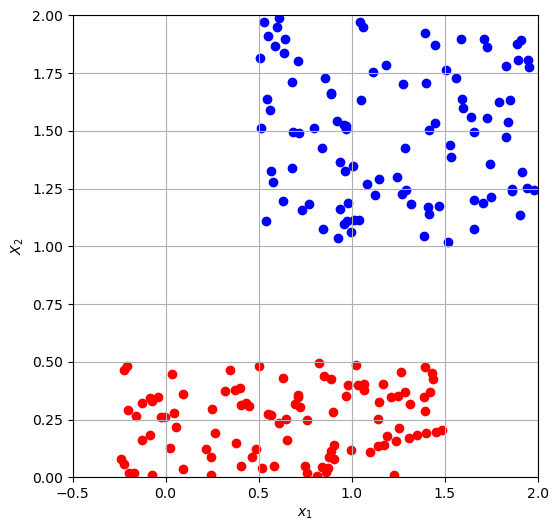

In [444]:
import random
import numpy as np
import matplotlib.pyplot as plt

N = 100

np.random.seed(42)

# class 0 design matrix.  One row per sample.  Each column is a feature.
X0 = np.random.uniform([0.5, 1], [2, 2], size=(N,2))

# class 1 design matrix.  One row per sample.  Each column is a feature.
X1 = np.random.uniform([-0.25, 0], [1.5, 0.5], size=(N,2))

plt.figure(figsize=(6, 6))
plt.scatter(X0[:,0], X0[:,1], color="blue")
plt.scatter(X1[:,0], X1[:,1], color="red")
plt.xlabel("$x_1$")
plt.ylabel("$X_2$")
plt.xlim(-0.5, 2)
plt.ylim(0, 2)
plt.grid(True)
plt.show()



**(b)** Because the data points for the two data sets generated in (a) are disjoint, there exists no region of ambiguity.
Include unit tests within this jupyter notebook that confirm that the GDA achieves
100% accuracy on this constructed dataset.  Normally we would implement far more than one
unit test.

**Answer 6(b)**

In [445]:
from sklearn.model_selection import train_test_split
from IPython.display import Markdown, display

y = np.array([0] * N + [1] * N)
X = np.vstack((X0, X1))
assert X.shape[0] == 2*N
assert y.shape[0] == 2*N

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

gda = GDA(X_train, y_train)

y_predict = np.array([gda(x) for x in X_val])
correct_count = np.sum(y_predict == y_val)
display(Markdown(f"**GDA accuracy:** {correct_count / y_predict.shape[0]}"))
assert correct_count == y_predict.shape[0]   # requires 100% accuracy.
display(Markdown("**Success**: achieved 100% accuracy")) 

**GDA accuracy:** 1.0

**Success**: achieved 100% accuracy

Although not needed for this part of the problem, we'll need to plot the boundary for part (e).

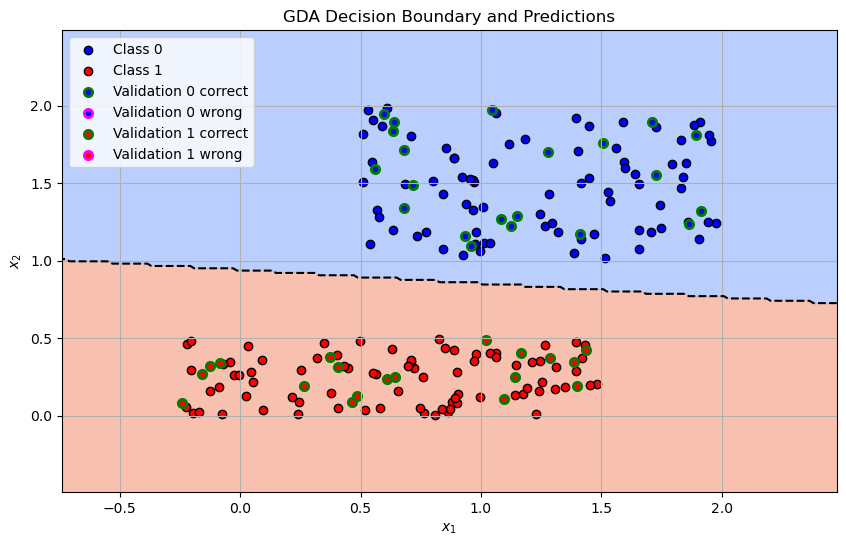

In [446]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(model, X, y, X_train, y_train, X_val, y_val, y_predict, 
                     title="Model Decision Boundary and Predictions"):
    # Assume X, y, gda are already defined as in your example.
    
    # 1. Create a grid of points in the feature space
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Flatten the grid points to pass them to the GDA model
    grid_points = np.c_[xx.ravel(), yy.ravel()]  # Combine xx, yy into a 2D array
    
    # 2. Evaluate predictions for each point on the grid
    predictions = model(grid_points)
    predictions = predictions.reshape(xx.shape)  # Reshape to match the grid
    
    # 3. Plot the decision boundary and half-spaces
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, predictions, alpha=0.6, cmap=plt.cm.coolwarm)  # Fill contours
    plt.contour(xx, yy, predictions, levels=[0.5], colors='k', linestyles='--')  # Decision boundary
    
    # 4. Scatter plot of the original data
    plt.scatter(X_train[y_train.flatten() == 0][:, 0], X_train[y_train.flatten() == 0][:, 1],
                color='blue', label='Class 0', edgecolor='k')
    plt.scatter(X_train[y_train.flatten() == 1][:, 0], X_train[y_train.flatten() == 1][:, 1],
                color='red', label='Class 1', edgecolor='k')

    corrects = (y_val == y_predict)

    X0_corrects = X_val[(y_val == 0) & (y_predict == 0)]
    X0_incorrects = X_val[(y_val == 0) & (y_predict == 1)]
    X1_corrects = X_val[(y_val == 1) & (y_predict == 1)]
    X1_incorrects = X_val[(y_val == 1) & (y_predict == 0)]

    plt.scatter(X0_corrects[:, 0], X0_corrects[:, 1],
                color='blue', label='Validation 0 correct', edgecolor='green', linewidths=2)
    plt.scatter(X0_incorrects[:, 0], X0_incorrects[:, 1],
                color='blue', label='Validation 0 wrong', edgecolor='magenta', linewidths=2)

    plt.scatter(X1_corrects[:, 0], X1_corrects[:, 1],
                color='red', label='Validation 1 correct', edgecolor='green', linewidths=2)
    plt.scatter(X1_incorrects[:, 0], X1_incorrects[:, 1],
                color='red', label='Validation 1 wrong', edgecolor='magenta', linewidths=2)

    # plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val.flatten() == 0][:, 1],
    #             color='blue', label='Class 0 val', edgecolor='green', linewidths=2)
    # plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val.flatten() == 1][:, 1],
    #             color='red', label='Class 1 val', edgecolor='magenta', linewidths=2)
    
    # 5. Formatting the plot
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(gda, X, y, X_train, y_train, X_val, y_val, y_predict, 
                 "GDA Decision Boundary and Predictions")

**(c)** Open the provided file `p6_data.csv`.  Divide the data into a training set and a test set.

**Answer 6(c)**

In [447]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('p6_data.csv')

# Extract features and target variable from the dataset
X = data[['Feature_1', 'Feature_2']]  # the feature columns
y = data['Label']  # the target column
X = X.to_numpy()
y = y.to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

data


,Feature_1,Feature_2,Label
0,0.427171,-0.130027,0
1,4.646079,2.600236,0
2,1.256307,3.824867,0
3,5.175187,-0.416318,0
4,0.903690,-0.462555,0
...,...,...,...
1995,-6.536135,7.503992,1
1996,-9.446937,3.206772,1
1997,-1.711223,5.825631,1
1998,4.423962,-0.397844,0


**(d)** Train a model using your implementation of Gaussian Discriminant Analysis.

**Answer 6(d)**

In [448]:
gda = GDA(X_train, y_train)

y_predict = gda(X_val)


**(e)** Output the data labelling each sample according to its class, and
color the background in each area according to which side of the decision
boundary the area resides.

**Answer 6(e)**

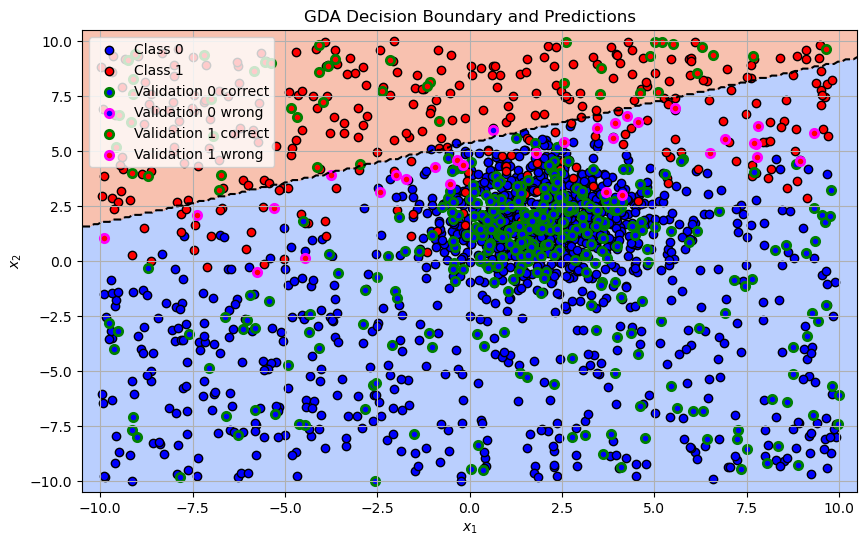

In [449]:
# I do a little more than is required to satisfy (e).  I also use edge color
# to denote correct and incorrect predictions for the validation set.

plot_predictions(gda, X, y, X_train, y_train, X_val, y_val, y_predict,
                "GDA Decision Boundary and Predictions")

**(f)** Output model parameters and the error rate, i.e., 1-accuracy.

**Answer 6(f)**

In [450]:
from IPython.display import Markdown, display

display(Markdown(f"""

Note that there may be slight differences in parameters and performance depending
on how you picked your training and validation datasets.

**GDA parameters**

$\mu_0 = [{gda.mu_0[0]:.2f}, {gda.mu_0[0]:.2f}]$

$\mu_1 = [{gda.mu_1[0]:.2f}, {gda.mu_1[1]:.2f}]$

$\phi = {gda.phi}$

$\Sigma = $"""))

print_matrix(gda.sigma)

display(Markdown(f"""

**GDA performance**

error = {np.mean(y_predict != y_val)}
""")) 



Note that there may be slight differences in parameters and performance depending
on how you picked your training and validation datasets.

**GDA parameters**

$\mu_0 = [1.27, 1.27]$

$\mu_1 = [-0.48, 6.18]$

$\phi = 0.198125$

$\Sigma = $

<IPython.core.display.Math object>



**GDA performance**

error = 0.08


**(g)** Assuming the sample data is unbiased and thus represents the true
distribution of data that would be seen "in the real world," could a non-linear model improve the error rate?

**Answer 6(g)**

Yes.  Something that creates a decision boundary that curves around the blue (class 0) 
cluster would be able to capture more of class 1 correctly.

Your answer doesn't have to match mine to get credit. 

**(h)** (up to 3 points extra credit) Find a non-linear method using PyTorch or scikit-learn
that reduces the error further.

**Answer 6(h)**

We give credit for any reasonable attempt using alternate methods.

## Problem 7

Implement logistic regression using only numpy and standard python libraries.  No existing implementation of
logistic regression is allowed.

**Answer 7**

Example implementation of logistic regression

In [451]:

import matplotlib.pyplot as plt
import numpy as np

# The following implementation adds the functionality of being able to step
# backwards.  I used this capability in lecture to step backwards and forwards
# showing the progression of logistic regression using stochastic gradient descent.

# SGD = Stochastic Gradient Descent
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self._learning_rate = learning_rate
        self._epochs = epochs
        self._theta_history = []  # Parameter vector including weights and bias

    @property
    def theta(self):
        return self._theta_history[-1]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        # Initialize theta (weights + bias as the first element)
        theta = np.random.randn(n_features + 1)
        self._theta_history.append(theta)

    def gradient(self, x, y):
        """Returns the scaled gradeint.  The gradient is scaled
           by the difference between the the predicted posterior
           probability y_predicted and the known truth y."""
        # Add a bias term (x_0 = 1) for each x sample
        x_with_bias = np.insert(x, 0, 1)

        # Compute prediction (hypothesis)
        z = np.dot(self.theta, x_with_bias)
        y_predicted = self.sigmoid(z)

        # Compute the gradient for each theta_j
        gradient = (y_predicted - y) * x_with_bias
        return gradient

    def update(self, x, y):

        theta = self._theta_history[-1].copy()

        # Update parameters (theta) using SGD
        theta -= self._learning_rate * self.gradient(x, y)
        self._theta_history.append(theta)

        # Return current theta (weights and bias)
        return theta

    def update_backward(self):
        if len(self._theta_history) > 1:
            self._theta_history.pop()
        return self._theta_history[-1]

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)

        for epoch in range(self._epochs):
            for i in range(n_samples):
                self.update(X[i], y[i])

    def predict(self, X):
        # Add bias term to each sample
        X_with_bias = np.insert(X, 0, 1, axis=1)
        z = np.dot(X_with_bias, self.theta)
        y_predicted = self.sigmoid(z)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def __call__(self, X):
        return self.predict(X)


**(a)** Apply the same unit test on your data set created in 6(a).

In [452]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Markdown, display

N = 100

np.random.seed(42)

# class 0 design matrix.  One row per sample.  Each column is a feature.
X0 = np.random.uniform([0.5, 1], [2, 2], size=(N,2))

# class 1 design matrix.  One row per sample.  Each column is a feature.
X1 = np.random.uniform([-0.25, 0], [1.5, 0.5], size=(N,2))

y = np.array([0] * N + [1] * N)
X = np.vstack((X0, X1))
assert X.shape[0] == 2*N
assert y.shape[0] == 2*N

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# I am outputting these here so that I can look at the convergence using the code
# I demoed in class.
import pandas as pd

# Combine features and labels for training and validation
train_data = pd.DataFrame(X_train, columns=[f"Feature{i+1}" for i in range(X_train.shape[1])])
train_data["Target"] = y_train

val_data = pd.DataFrame(X_val, columns=[f"Feature{i+1}" for i in range(X_val.shape[1])])
val_data["Target"] = y_val

# Save the datasets to CSV files
train_csv_path = "train_data.csv"
val_csv_path = "val_data.csv"

train_data.to_csv(train_csv_path, index=False)
val_data.to_csv(val_csv_path, index=False)

print(f"Training data saved to {train_csv_path}")
print(f"Validation data saved to {val_csv_path}")

Training data saved to train_data.csv
Validation data saved to val_data.csv


In [453]:
model = LogisticRegressionSGD(epochs=10)
model.fit(X_train, y_train)

y_predict = model(X_val)
correct_count = np.sum(y_predict == y_val)
display(Markdown(f"**logistic regression accuracy:** {correct_count / y_predict.shape[0]}"))


**logistic regression accuracy:** 1.0

**(b)** Because the data points for the two data sets generated in (a) are disjoint, there exists no region of ambiguity.
Include unit tests within this jupyter notebook that confirm that logistic regression achieves
100% accuracy on this constructed dataset.  

**Answer 7(b)**

Part (b) is almost identical to part (a).  It would be reasonable to combine (a) and (b) in your answer.

In [454]:
assert correct_count == y_predict.shape[0]   # requires 100% accuracy.
display(Markdown("**Success**: achieved 100% accuracy")) 

**Success**: achieved 100% accuracy

**(c)** Using the training and test datasets from `p6_data.csv` used in Problem 6,
train a model using your implementation of logistic regression.

**Answer 7(c)**

In [455]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('p6_data.csv')

# Extract features and target variable from the dataset
X = data[['Feature_1', 'Feature_2']]  # the feature columns
y = data['Label']  # the target column
X = X.to_numpy()
y = y.to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegressionSGD()
model.fit(X_train, y_train)


**(d)** Output the data labelling each sample according to its class, and
color the background in each area according to which side of the decision
boundary the area resides.

**Answer 7(d)**

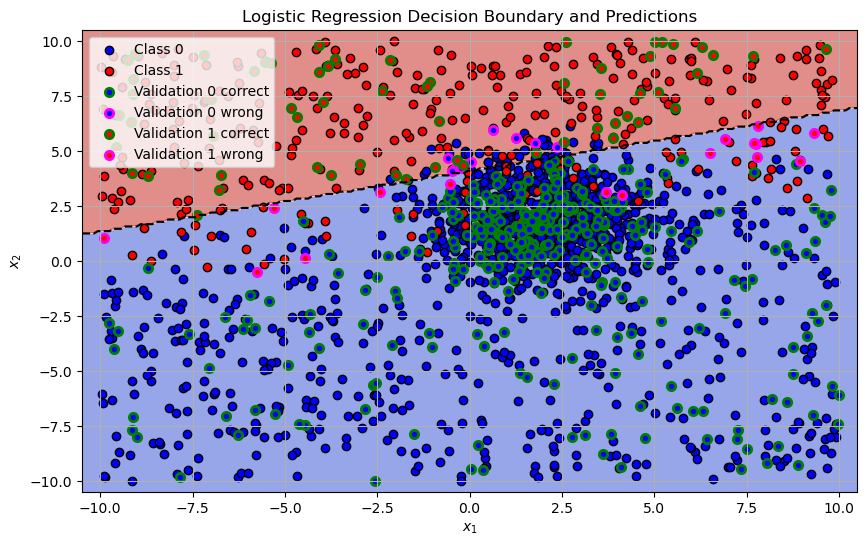

In [456]:
y_predict = model.predict(X_val)

# I do a little more than is required to satisfy (e).  I also use edge color
# to denote correct and incorrect predictions for the validation set.

plot_predictions(model, X, y, X_train, y_train, X_val, y_val, y_predict,
                "Logistic Regression Decision Boundary and Predictions")

**(e)** Output model parameters and the error rate, i.e., 1-accuracy.

In [458]:
from IPython.display import Markdown, display

display(Markdown(f"""

Note that there may be slight differences in parameters and performance depending
on how you picked your training and validation datasets.

**Logistic Regression Parameters**

$\Theta = [{model.theta[0]:.2f}, {model.theta[1]:.2f}, {model.theta[2]:.2f}]$
"""))
        
display(Markdown(f"""

**Logistic Regression Performance**

error = {np.mean(y_predict != y_val)}
"""))



Note that there may be slight differences in parameters and performance depending
on how you picked your training and validation datasets.

**Logistic Regression Parameters**

$\Theta = [-5.19, -0.35, 1.27]$




**Logistic Regression Performance**

error = 0.0625


## Problem 8

Repeat problem 6(c)-(g) for data in `p8_data.csv`.  Aside: assume the unit test in (a) and (b) from problem 6 still apply.

**Answer 8(a)**

n/a

**Answer 8(b)**

n/a

**(c)** Open the provided file `p8_data.csv`.  Divide the data into a training set and a test set.

**Answer 8(c)**


In [459]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('p8_data.csv')

# Extract features and target variable from the dataset
X = data[['Feature_1', 'Feature_2']]  # the feature columns
y = data['Label']  # the target column
X = X.to_numpy()
y = y.to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
data

,Feature_1,Feature_2,Label
0,0.629904,-2.129573,1
1,0.146257,-1.888882,1
2,0.383993,0.190357,0
3,0.195282,0.404416,1
4,-0.429716,-0.373012,1
...,...,...,...
1195,-0.015887,1.280505,0
1196,1.471634,0.594606,0
1197,1.856440,1.383434,0
1198,-0.251526,0.256209,1


**(d)** Train a model using your implementation of logistic regression.

**Answer 8(d)**

In [460]:
model = GDA(X_train, y_train)


**(e)** Output the data labelling each sample according to its class, and
color the background in each area according to which side of the decision
boundary the area resides.

**Answer 8(e)**

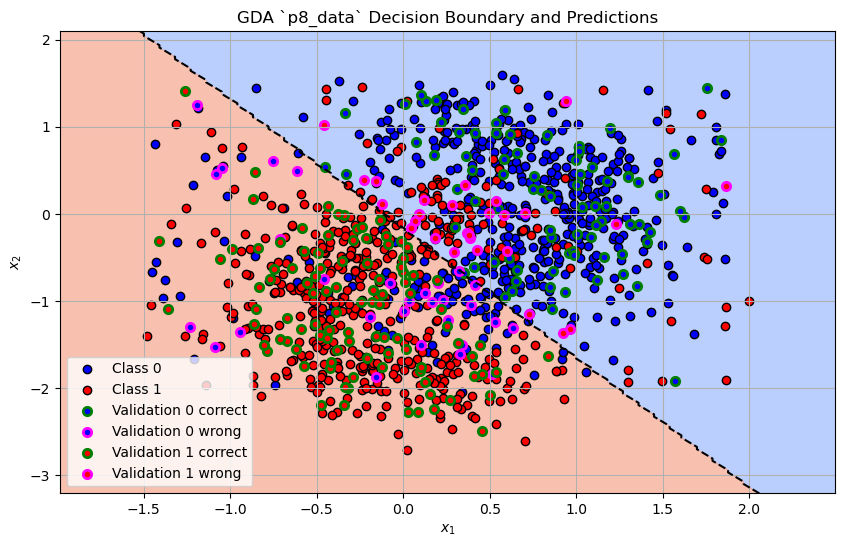

In [461]:
y_predict = model(X_val)

plot_predictions(model, X, y, X_train, y_train, X_val, y_val, y_predict, 
                 "GDA `p8_data` Decision Boundary and Predictions")

**(f)** Output model parameters and the error rate, i.e., 1-accuracy.

**Answer 8(f)**

In [462]:
from IPython.display import Markdown, display

display(Markdown(f"""

Note that there may be slight differences in parameters and performance depending
on how you picked your training and validation datasets.

**GDA parameters**

$\mu_0 = [{gda.mu_0[0]:.2f}, {gda.mu_0[0]:.2f}]$

$\mu_1 = [{gda.mu_1[0]:.2f}, {gda.mu_1[1]:.2f}]$

$\phi = {gda.phi}$

$\Sigma = $"""))

print_matrix(gda.sigma)

display(Markdown(f"""

**GDA performance**

error = {np.mean(y_predict != y_val)}
""")) 



Note that there may be slight differences in parameters and performance depending
on how you picked your training and validation datasets.

**GDA parameters**

$\mu_0 = [1.27, 1.27]$

$\mu_1 = [-0.48, 6.18]$

$\phi = 0.198125$

$\Sigma = $

<IPython.core.display.Math object>



**GDA performance**

error = 0.23333333333333334


**(g)** Assuming the sample data is unbiased and thus represents the true
distribution of data that would be seen "in the real world," could a non-linear model improve the error rate?

**Answer 8(g)**

Yes.  The data looks like two interlocking letter C's.  There are not linearly separable.
A non-linear model that can create a decision boundary that follows the contours of the C's will
fair better.

**(h)** (up to 3 points extra credit) Find a non-linear method using PyTorch or scikit-learn
that reduces the error further on data `p8_data.csv`.

**Answer 8(h)**

Any number of possible algorithms could be tried.  We give credit for any reasonable
attempt.

## Problem 9

Reapeat problem 7(c)-(e) for data `p8_data.csv` using the training and test data sets 
created in Problem 7.


In [463]:
model = LogisticRegressionSGD()
model.fit(X_train, y_train)

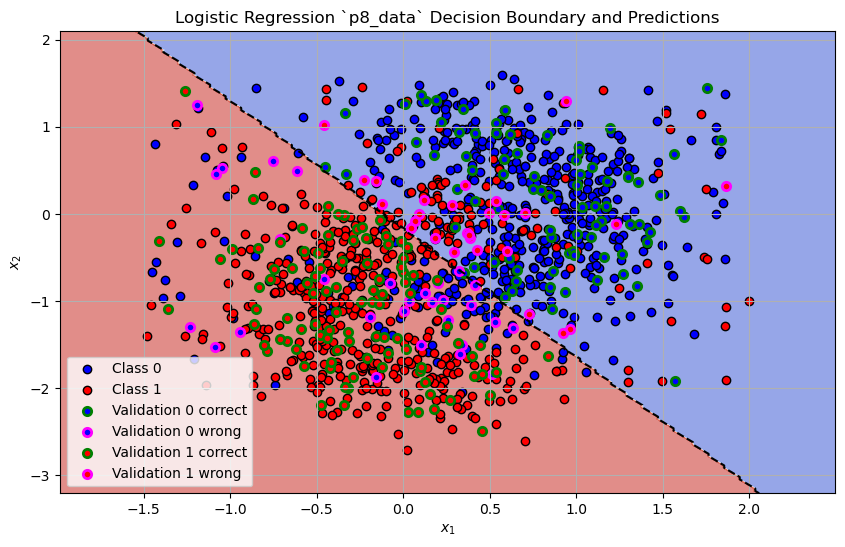

In [464]:
y_predict = model(X_val)

plot_predictions(model, X, y, X_train, y_train, X_val, y_val, y_predict, 
                 "Logistic Regression `p8_data` Decision Boundary and Predictions")

In [465]:
from IPython.display import Markdown, display

display(Markdown(f"""

Note that there may be slight differences in parameters and performance depending
on how you picked your training and validation datasets.

**Logistic Regression Parameters**

$\Theta = [{model.theta[0]:.2f}, {model.theta[1]:.2f}, {model.theta[2]:.2f}]$
"""))
        
display(Markdown(f"""

**Logistic Regression Performance**

error = {np.mean(y_predict != y_val)}
"""))



Note that there may be slight differences in parameters and performance depending
on how you picked your training and validation datasets.

**Logistic Regression Parameters**

$\Theta = [-0.18, -1.58, -1.07]$




**Logistic Regression Performance**

error = 0.23333333333333334
